# Spatial distribution of oscillations recorded with BSSU

Import Packages

In [1]:

import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind

import seaborn as sns
import pingouin as pg
import itertools
from itertools import combinations
from statannotations.Annotator import Annotator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report

# import openpyxl
# from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 
from mne.stats import permutation_cluster_test


# TODO: add README file: 
# pip install pingouin
# pip install statannotations
# pip install fooof

In [2]:
jennifer_user_path = os.getcwd()
while jennifer_user_path[-14:] != 'jenniferbehnke':
    jennifer_user_path = os.path.dirname(jennifer_user_path)

# directory to this Repository
project_path = os.path.join(jennifer_user_path, 'code', 'BetaSenSightLongterm', 'BetaSenSightLongterm')
sys.path.append(project_path)

os.chdir(project_path)

import src.bssu.utils.find_folders as find_folders
importlib.reload(find_folders)

# import PyPerceive

project_path = find_folders.chdir_repository("Py_Perceive")

from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)

import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as PyPerceive_find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

# import meet

project_path = find_folders.chdir_repository("meet")

import meet as meet

# import all functions from BetaSenSightLongterm
project_path = find_folders.chdir_repository("BetaSenSightLongterm")

# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd

# bipolar Channel Analysis
import src.bssu.bipolar.power_spectra_plots as power_spectra_plots
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol
import src.bssu.monopolar.monoRef_weightPsdAverageByCoordinateDistance as MonoRefWeightedCoordinateDistance
import src.bssu.monopolar.externalized_lfp as externalized
import src.bssu.monopolar.monopol_method_comparison as monopol_comparison
import src.bssu.monopolar.bssu_contacts_maximal_beta as bssu_contacts
import src.bssu.monopolar.monoRef_Strelow as detec_strelow

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks
import src.bssu.ranking.beta_rank_longitudinal_changes as beta_rank_change


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF
import src.bssu.utils.load_data_files as load_data
import src.bssu.utils.monopol_comparison_helpers as mono_comp_helpers

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(power_spectra_plots)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(MonoRefWeightedCoordinateDistance)
importlib.reload(load_data)
importlib.reload(externalized)
importlib.reload(monopol_comparison)
importlib.reload(bssu_contacts)
importlib.reload(mono_comp_helpers)
importlib.reload(detec_strelow)
importlib.reload(beta_rank_change)

Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data
Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data


<module 'src.bssu.ranking.beta_rank_longitudinal_changes' from '/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/ranking/beta_rank_longitudinal_changes.py'>

In [6]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

In [ ]:
# write float with number of values after comma defined "{:.15f}".format(pval)

## Loading with classes

In [ ]:
incl_sub = ["017", "019", "021", "024", "025", "026", "029", "030", "031", "032", "033", "037", "038", "040", "041", "045"]
hemispheres = ["Right", "Left"]

psdAverage_dataframe = pd.DataFrame()

for sub in incl_sub:

    for hem in hemispheres:

        # load data from classes
        mainClass_data = mainAnalysis_class.MainClass(
            sub=sub,
            hemisphere=hem,
            filter="band-pass",
            result="PSDaverageFrequencyBands",
            incl_session=["fu3m"],
            pickChannels=['03', '13', '02', '12', '01', '23', 
                            '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
                            '1A2A', '1B2B', '1C2C'],
            normalization=["rawPsd"],
            freqBands=["beta", "lowBeta", "highBeta"],
            feature=["averagedPSD"]
        )

        # get the fu3m Dataframe
        fu3m_DF = mainClass_data.fu3m.Result_DF
        fu3m_DF_copy = fu3m_DF.copy()

        # add columnn subject_hemisphere
        fu3m_DF_copy["subject_hemisphere"] = f"{sub}_{hem}"

        # add column recording_montage
        for index, row in fu3m_DF_copy.iterrows():
            bipolarChannel = row["bipolarChannel"].split("_")
            recording_montage = bipolarChannel[2] # just take 03, 02, etc from bipolarChannel column

            fu3m_DF_copy.loc[index, "recording_montage"] = recording_montage
        
        # only get rows with rawPsd and beta 
        fu3m_DF_copy = fu3m_DF_copy[fu3m_DF_copy.absoluteOrRelativePSD == "rawPsd"]
        fu3m_DF_copy = fu3m_DF_copy[fu3m_DF_copy.frequencyBand == "beta"]

        # rename column averagedPSD to beta_psd
        fu3m_DF_copy = fu3m_DF_copy.rename(columns={"averagedPSD": "beta_psd"})
        
        # drop columns bipolarChannel, 
        fu3m_DF_copy = fu3m_DF_copy.drop(columns=["bipolarChannel", "frequencyBand", "absoluteOrRelativePSD"])

        # concatenate all dataframes together
        psdAverage_dataframe = pd.concat([psdAverage_dataframe, fu3m_DF_copy], ignore_index=True)
                



# write Dataframe to Excel
# store each Dataframe in seperate sheets of an Excel file
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

Excel_path = os.path.join(current_path, 'Longterm_beta_project','data', 'imagingData', 'SenSight_fu3m_beta_psd.xlsx')

# create an Excel writer, so that different sheets are written within the same excel file
with pd.ExcelWriter(Excel_path) as writer:
    
    psdAverage_dataframe.to_excel(writer, sheet_name="beta_psd")

## 1. Plot the differences between ranks of beta psd in different channel groups

In [ ]:
data = BIP_ranks.BIPranks_plotDifferenceBetweenSessions(
     data2plot="psdAverage_ranks",
     filterSignal="band-pass",
     normalization="rawPsd",
     freqBand="beta",
)

## 2. Permutation analysis of bipolar power ranks between different sessions within 3 channel groups

In [8]:
# automatized Function to rank Psd averages 
### watch out!! for result="peak" -> not every BIP channel has a value... don´t understand why
### especially postop channels!!!

rankDF = BIP_ranks.Rank_BIPRingSegmGroups(
    result = "psdAverage",
    filterSignal = "band-pass",
    normalization = "rawPsd",
    freqBand = "highBeta"
)


pickle file:  BIPpsdAverage_Ring_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file:  BIPpsdAverage_SegmInter_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file:  BIPpsdAverage_SegmIntra_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
new file:  BIPranksChannelGroup_session_dict_psdAverage_highBeta_rawPsd_band-pass.pickle 
in:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [10]:
rankDF["ranks_channelGroup_session_dictionary"]["Ring_fu3m"]

session   bipolarChannel frequencyBand absoluteOrRelativePSD  averagedPSD  \
0     fu3m  LFP_R_12_STN_MT      highBeta                rawPsd     0.372421   
1     fu3m  LFP_R_01_STN_MT      highBeta                rawPsd     0.122228   
2     fu3m  LFP_R_23_STN_MT      highBeta                rawPsd     0.321456   
3     fu3m  LFP_L_12_STN_MT      highBeta                rawPsd     0.085488   
4     fu3m  LFP_L_01_STN_MT      highBeta                rawPsd     0.101783   
..     ...              ...           ...                   ...          ...   
67    fu3m  LFP_R_01_STN_MT      highBeta                rawPsd     1.085730   
68    fu3m  LFP_R_23_STN_MT      highBeta                rawPsd     1.340245   
69    fu3m  LFP_L_12_STN_MT      highBeta                rawPsd     1.025313   
70    fu3m  LFP_L_01_STN_MT      highBeta                rawPsd     1.773379   
71    fu3m  LFP_L_23_STN_MT      highBeta                rawPsd     0.101616   

    rank subject_hemisphere  
0    1.0          017_Right  
1    3.0          017_Right  
2    2.0          017_Right  
3    3.0           017_Left  
4    2.0           017_Left  
..   ...                ...  
67   3.0          038_Right  
68   2.0          038_Right  
69   2.0           038_Left  
70   1.0           038_Left  
71   3.0           038_Left  

[72 rows x 7 columns]

In [11]:
# structure and write the files necessary for Permutation -> e.g. "\nBIPpermutationDF_Postop_Fu3m_{result}_{freqBand}_{normalization}_{filterSignal}.pickle
Write_sessionComparison_Dataframes = BIP_ranks.Permutation_BIPranksRingSegmGroups(
    result="psdAverage",
    difference="rank",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="lowBeta",
)

pickle file loaded:  BIPranksChannelGroup_session_dict_psdAverage_lowBeta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
files:  BIP_relativePsdToRank1_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Postop_Fu3m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Postop_Fu12m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Postop_Fu18m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Fu3m_Fu12m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Fu3m_Fu18m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
BIPpermutationDF_Fu12m_Fu18m_psdAverage_lowBeta_rawPsd_band-pass.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [14]:
load_BIPchannelGroup_sessionPickle = loadResults.load_BIPchannelGroup_sessionPickle(
    result="psdAverage",
    freqBand="beta",
    normalization="rawPsd",
    filterSignal="band-pass"
)

pickle file loaded:  BIPranksChannelGroup_session_dict_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [16]:
load_BIPchannelGroup_sessionPickle["Ring_fu3m"].head()

session   bipolarChannel frequencyBand absoluteOrRelativePSD  averagedPSD  \
0    fu3m  LFP_R_12_STN_MT          beta                rawPsd     0.298595   
1    fu3m  LFP_R_01_STN_MT          beta                rawPsd     0.131716   
2    fu3m  LFP_R_23_STN_MT          beta                rawPsd     0.299057   
3    fu3m  LFP_L_12_STN_MT          beta                rawPsd     0.095521   
4    fu3m  LFP_L_01_STN_MT          beta                rawPsd     0.114322   

   rank subject_hemisphere  
0   2.0          017_Right  
1   3.0          017_Right  
2   1.0          017_Right  
3   3.0           017_Left  
4   2.0           017_Left

In [9]:
data = loadResults.load_BIPchannelGroupsPickle(
    result="psdAverage",
    channelGroup=["Ring", "SegmInter", "SegmIntra"],
    normalization="rawPsd",
    filterSignal="band-pass"

)

pickle file:  BIPpsdAverage_Ring_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file:  BIPpsdAverage_SegmInter_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file:  BIPpsdAverage_SegmIntra_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [10]:
data["Ring"]["017_Right_fu3m_alpha"]

session   bipolarChannel  \
fu3m_LFP_R_03_STN_MT_psdAverage_rawPsd_alpha    fu3m  LFP_R_03_STN_MT   
fu3m_LFP_R_13_STN_MT_psdAverage_rawPsd_alpha    fu3m  LFP_R_13_STN_MT   
fu3m_LFP_R_02_STN_MT_psdAverage_rawPsd_alpha    fu3m  LFP_R_02_STN_MT   
fu3m_LFP_R_12_STN_MT_psdAverage_rawPsd_alpha    fu3m  LFP_R_12_STN_MT   
fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_alpha    fu3m  LFP_R_01_STN_MT   
fu3m_LFP_R_23_STN_MT_psdAverage_rawPsd_alpha    fu3m  LFP_R_23_STN_MT   

                                             frequencyBand  \
fu3m_LFP_R_03_STN_MT_psdAverage_rawPsd_alpha         alpha   
fu3m_LFP_R_13_STN_MT_psdAverage_rawPsd_alpha         alpha   
fu3m_LFP_R_02_STN_MT_psdAverage_rawPsd_alpha         alpha   
fu3m_LFP_R_12_STN_MT_psdAverage_rawPsd_alpha         alpha   
fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_alpha         alpha   
fu3m_LFP_R_23_STN_MT_psdAverage_rawPsd_alpha         alpha   

                                             absoluteOrRelativePSD  \
fu3m_LFP_R_03_STN_MT_psdAverage_rawPsd_alpha                rawPsd   
fu3m_LFP_R_13_STN_MT_psdAverage_rawPsd_alpha                rawPsd   
fu3m_LFP_R_02_STN_MT_psdAverage_rawPsd_alpha                rawPsd   
fu3m_LFP_R_12_STN_MT_psdAverage_rawPsd_alpha                rawPsd   
fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_alpha                rawPsd   
fu3m_LFP_R_23_STN_MT_psdAverage_rawPsd_alpha                rawPsd   

                                              averagedPSD  
fu3m_LFP_R_03_STN_MT_psdAverage_rawPsd_alpha     0.645340  
fu3m_LFP_R_13_STN_MT_psdAverage_rawPsd_alpha     0.437049  
fu3m_LFP_R_02_STN_MT_psdAverage_rawPsd_alpha     0.661888  
fu3m_LFP_R_12_STN_MT_psdAverage_rawPsd_alpha     0.268085  
fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_alpha     0.441523  
fu3m_LFP_R_23_STN_MT_psdAverage_rawPsd_alpha     0.283438

### 2.1 Perform Permutation of all session comparisons

In [18]:
permute_BIP_ranks = Permute_ranks.PermutationTest_BIPchannelGroups(
    data2permute="psdAverage",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="highBeta"
)

In [ ]:
permute_BIP_ranks

In [ ]:
# plot p values of permutation test

Ring_comparisons = permute_BIP_ranks.loc[(permute_BIP_ranks.channelGroup=="Ring")]
SegmInter_comparisons = permute_BIP_ranks.loc[(permute_BIP_ranks.channelGroup=="SegmInter")]
SegmIntra_comparisons = permute_BIP_ranks.loc[(permute_BIP_ranks.channelGroup=="SegmIntra")]

fig=plt.figure()
plt.scatter(Ring_comparisons["comparison"], Ring_comparisons["p-value"])
plt.ylabel("p-value")
plt.ylim(-0.05, 0.17)

plt.show()


In [ ]:
# use function Permutation_BIPranksRingSegmGroups to restructure the Dataframes with the rankings and create comparison Dataframes 

Permutation_dict = BIP_ranks.Permutation_BIPranksRingSegmGroups(
    result="psdAverage",
    difference="rank",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

In [11]:
data = loadResults.load_BIPpermutationComparisonsPickle(
    result="psdAverage",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

pickle file loaded:  BIPpermutationDF_Postop_Postop_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Postop_Fu3m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Postop_Fu12m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Postop_Fu18m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Fu3m_Postop_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Fu3m_Fu3m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_

In [13]:
postopFu3mRingData = data["Fu3m_Fu12m"]["Ring"]
postopFu3mRingData.head()

recording_type_x session_x  averagedPSD_x  rank_x sub_hem_BIPchannel  \
0             Ring      fu3m       0.298595     2.0   017_Right_BIP_12   
1             Ring      fu3m       0.131716     3.0   017_Right_BIP_01   
2             Ring      fu3m       0.299057     1.0   017_Right_BIP_23   
3             Ring      fu3m       0.095521     3.0    017_Left_BIP_12   
4             Ring      fu3m       0.114322     2.0    017_Left_BIP_01   

  recording_type_y session_y  averagedPSD_y  rank_y  Difference_rank_x_y  \
0             Ring     fu12m       0.189567     3.0                  1.0   
1             Ring     fu12m       0.242426     2.0                  1.0   
2             Ring     fu12m       0.788483     1.0                  0.0   
3             Ring     fu12m       0.221342     2.0                  1.0   
4             Ring     fu12m       0.227817     1.0                  1.0   

   Difference_psdAverage_x_y  
0                   0.109028  
1                   0.110709  
2                   0.489426  
3                   0.125821  
4                   0.113495

### 2.2 Plot the Heatmap of pvalues between the Permutation results of session comparisons

In [8]:
result = loadResults.load_BIPpermutation_ranks_result(
        data2permute="psdAverage",
        filterSignal="band-pass",
        normalization="rawPsd",
        freqBand="beta"
        )
    

In [10]:
result.head()

comparison channelGroup MEAN_differenceOfRanks  \
Postop_Postop_Ring       Postop_Postop         Ring                    0.0   
Postop_Postop_SegmInter  Postop_Postop    SegmInter                    0.0   
Postop_Postop_SegmIntra  Postop_Postop    SegmIntra                    0.0   
Postop_Fu3m_Ring           Postop_Fu3m         Ring               0.533333   
Postop_Fu3m_SegmInter      Postop_Fu3m    SegmInter                    0.4   

                        distanceMEANreal_MEANrandom            p-value  
Postop_Postop_Ring                        -5.560814  0.000000013425985  
Postop_Postop_SegmInter                   -5.698809  0.000000006032364  
Postop_Postop_SegmIntra                   -9.935757  0.000000000000000  
Postop_Fu3m_Ring                          -2.151105  0.015733955976777  
Postop_Fu3m_SegmInter                     -3.280348  0.000518396075470

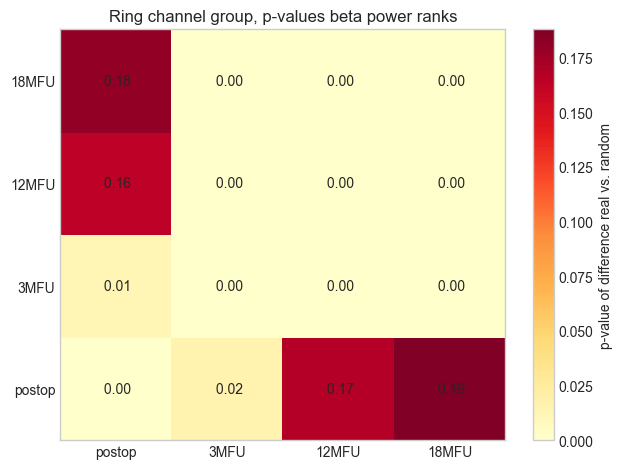

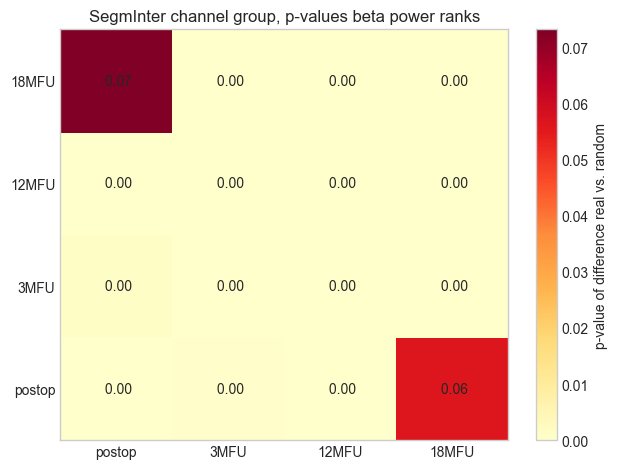

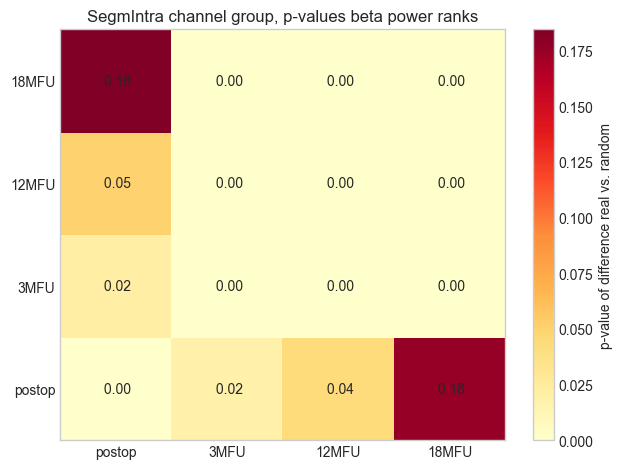

In [36]:
heatmap_permutation_distances = Permute_ranks.heatmap_distances_to_permutated_mean(
    data2permute="psdAverage",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

In [20]:
permutation_results = loadResults.load_BIPpermutation_ranks_result(
    data2permute="psdAverage",
    filterSignal="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

In [21]:
permutation_results

comparison channelGroup MEAN_differenceOfRanks  \
Postop_Postop_Ring       Postop_Postop         Ring                    0.0   
Postop_Postop_SegmInter  Postop_Postop    SegmInter                    0.0   
Postop_Postop_SegmIntra  Postop_Postop    SegmIntra                    0.0   
Postop_Fu3m_Ring           Postop_Fu3m         Ring               0.533333   
Postop_Fu3m_SegmInter      Postop_Fu3m    SegmInter                    0.4   
Postop_Fu3m_SegmIntra      Postop_Fu3m    SegmIntra               1.566667   
Postop_Fu12m_Ring         Postop_Fu12m         Ring               0.733333   
Postop_Fu12m_SegmInter    Postop_Fu12m    SegmInter               0.266667   
Postop_Fu12m_SegmIntra    Postop_Fu12m    SegmIntra               1.633333   
Postop_Fu18m_Ring         Postop_Fu18m         Ring               0.666667   
Postop_Fu18m_SegmInter    Postop_Fu18m    SegmInter                    0.5   
Postop_Fu18m_SegmIntra    Postop_Fu18m    SegmIntra               1.666667   
Fu3m_Postop_Ring           Fu3m_Postop         Ring               0.533333   
Fu3m_Postop_SegmInter      Fu3m_Postop    SegmInter                    0.4   
Fu3m_Postop_SegmIntra      Fu3m_Postop    SegmIntra               1.566667   
Fu3m_Fu3m_Ring               Fu3m_Fu3m         Ring                    0.0   
Fu3m_Fu3m_SegmInter          Fu3m_Fu3m    SegmInter                    0.0   
Fu3m_Fu3m_SegmIntra          Fu3m_Fu3m    SegmIntra                    0.0   
Fu3m_Fu12m_Ring             Fu3m_Fu12m         Ring               0.333333   
Fu3m_Fu12m_SegmInter        Fu3m_Fu12m    SegmInter               0.222222   
Fu3m_Fu12m_SegmIntra        Fu3m_Fu12m    SegmIntra               1.111111   
Fu3m_Fu18m_Ring             Fu3m_Fu18m         Ring                    0.2   
Fu3m_Fu18m_SegmInter        Fu3m_Fu18m    SegmInter                    0.2   
Fu3m_Fu18m_SegmIntra        Fu3m_Fu18m    SegmIntra               1.266667   
Fu12m_Postop_Ring         Fu12m_Postop         Ring               0.733333   
Fu12m_Postop_SegmInter    Fu12m_Postop    SegmInter               0.266667   
Fu12m_Postop_SegmIntra    Fu12m_Postop    SegmIntra               1.633333   
Fu12m_Fu3m_Ring             Fu12m_Fu3m         Ring               0.333333   
Fu12m_Fu3m_SegmInter        Fu12m_Fu3m    SegmInter               0.222222   
Fu12m_Fu3m_SegmIntra        Fu12m_Fu3m    SegmIntra               1.111111   
Fu12m_Fu12m_Ring           Fu12m_Fu12m         Ring                    0.0   
Fu12m_Fu12m_SegmInter      Fu12m_Fu12m    SegmInter                    0.0   
Fu12m_Fu12m_SegmIntra      Fu12m_Fu12m    SegmIntra                    0.0   
Fu12m_Fu18m_Ring           Fu12m_Fu18m         Ring                    0.2   
Fu12m_Fu18m_SegmInter      Fu12m_Fu18m    SegmInter               0.266667   
Fu12m_Fu18m_SegmIntra      Fu12m_Fu18m    SegmIntra                    0.9   
Fu18m_Postop_Ring         Fu18m_Postop         Ring               0.666667   
Fu18m_Postop_SegmInter    Fu18m_Postop    SegmInter                    0.5   
Fu18m_Postop_SegmIntra    Fu18m_Postop    SegmIntra               1.666667   
Fu18m_Fu3m_Ring             Fu18m_Fu3m         Ring                    0.2   
Fu18m_Fu3m_SegmInter        Fu18m_Fu3m    SegmInter                    0.2   
Fu18m_Fu3m_SegmIntra        Fu18m_Fu3m    SegmIntra               1.266667   
Fu18m_Fu12m_Ring           Fu18m_Fu12m         Ring                    0.2   
Fu18m_Fu12m_SegmInter      Fu18m_Fu12m    SegmInter               0.266667   
Fu18m_Fu12m_SegmIntra      Fu18m_Fu12m    SegmIntra                    0.9   
Fu18m_Fu18m_Ring           Fu18m_Fu18m         Ring                    0.0   
Fu18m_Fu18m_SegmInter      Fu18m_Fu18m    SegmInter                    0.0   
Fu18m_Fu18m_SegmIntra      Fu18m_Fu18m    SegmIntra                    0.0   

                        distanceMEANreal_MEANrandom            p-value  
Postop_Postop_Ring                        -5.560814  0.000000013425985  
Postop_Postop_SegmInter                   -5.698809  0.0000

## 2. Permutation analysis of beta ranks -> FOOOF spectra

1. Perform Permutation of all session comparisons

In [9]:
fooof_beta_rank_permutation = Permute_ranks.permutation_fooof_beta_ranks(
    fooof_spectrum="periodic_spectrum"
)

In [10]:
data = loadResults.load_fooof_permutation_bip_beta_ranks()

In [11]:
data

comparison channel_group  \
postop_postop_ring                    postop_postop          ring   
postop_postop_segm_inter              postop_postop    segm_inter   
postop_postop_segm_intra              postop_postop    segm_intra   
postop_fu3m_ring                        postop_fu3m          ring   
postop_fu3m_segm_inter                  postop_fu3m    segm_inter   
postop_fu3m_segm_intra                  postop_fu3m    segm_intra   
postop_fu12m_ring                      postop_fu12m          ring   
postop_fu12m_segm_inter                postop_fu12m    segm_inter   
postop_fu12m_segm_intra                postop_fu12m    segm_intra   
postop_fu18or24m_ring              postop_fu18or24m          ring   
postop_fu18or24m_segm_inter        postop_fu18or24m    segm_inter   
postop_fu18or24m_segm_intra        postop_fu18or24m    segm_intra   
fu3m_postop_ring                        fu3m_postop          ring   
fu3m_postop_segm_inter                  fu3m_postop    segm_inter   
fu3m_postop_segm_intra                  fu3m_postop    segm_intra   
fu3m_fu3m_ring                            fu3m_fu3m          ring   
fu3m_fu3m_segm_inter                      fu3m_fu3m    segm_inter   
fu3m_fu3m_segm_intra                      fu3m_fu3m    segm_intra   
fu3m_fu12m_ring                          fu3m_fu12m          ring   
fu3m_fu12m_segm_inter                    fu3m_fu12m    segm_inter   
fu3m_fu12m_segm_intra                    fu3m_fu12m    segm_intra   
fu3m_fu18or24m_ring                  fu3m_fu18or24m          ring   
fu3m_fu18or24m_segm_inter            fu3m_fu18or24m    segm_inter   
fu3m_fu18or24m_segm_intra            fu3m_fu18or24m    segm_intra   
fu12m_postop_ring                      fu12m_postop          ring   
fu12m_postop_segm_inter                fu12m_postop    segm_inter   
fu12m_postop_segm_intra                fu12m_postop    segm_intra   
fu12m_fu3m_ring                          fu12m_fu3m          ring   
fu12m_fu3m_segm_inter                    fu12m_fu3m    segm_inter   
fu12m_fu3m_segm_intra                    fu12m_fu3m    segm_intra   
fu12m_fu12m_ring                        fu12m_fu12m          ring   
fu12m_fu12m_segm_inter                  fu12m_fu12m    segm_inter   
fu12m_fu12m_segm_intra                  fu12m_fu12m    segm_intra   
fu12m_fu18or24m_ring                fu12m_fu18or24m          ring   
fu12m_fu18or24m_segm_inter          fu12m_fu18or24m    segm_inter   
fu12m_fu18or24m_segm_intra          fu12m_fu18or24m    segm_intra   
fu18or24m_postop_ring              fu18or24m_postop          ring   
fu18or24m_postop_segm_inter        fu18or24m_postop    segm_inter   
fu18or24m_postop_segm_intra        fu18or24m_postop    segm_intra   
fu18or24m_fu3m_ring                  fu18or24m_fu3m          ring   
fu18or24m_fu3m_segm_inter            fu18or24m_fu3m    segm_inter   
fu18or24m_fu3m_segm_intra            fu18or24m_fu3m    segm_intra   
fu18or24m_fu12m_ring                fu18or24m_fu12m          ring   
fu18or24m_fu12m_segm_inter          fu18or24m_fu12m    segm_inter   
fu18or24m_fu12m_segm_intra          fu18or24m_fu12m    segm_intra   
fu18or24m_fu18or24m_ring        fu18or24m_fu18or24m          ring   
fu18or24m_fu18or24m_segm_inter  fu18or24m_fu18or24m    segm_inter   
fu18or24m_fu18or24m_segm_intra  fu18or24m_fu18or24m    segm_intra   

                               sample_size_stn  \
postop_postop_ring                          32   
postop_postop_segm_inter                    32   
postop_postop_segm_intra                    32   
postop_fu3m_ring                            28   
postop_fu3m_segm_inter                      28   
postop_fu3m_segm_intra                      28   
postop_fu12m_ring                           14   
postop_fu12m_segm_inter                     14   
postop_fu12m_segm_intra                     14   
postop_fu18or24m_ring                        6   
postop_fu18or24m_segm_inter                  6   
postop_fu18or24m_segm_intra                  6   
fu3m_post

Plot a heatmap of p values of beta rank differences between sessions

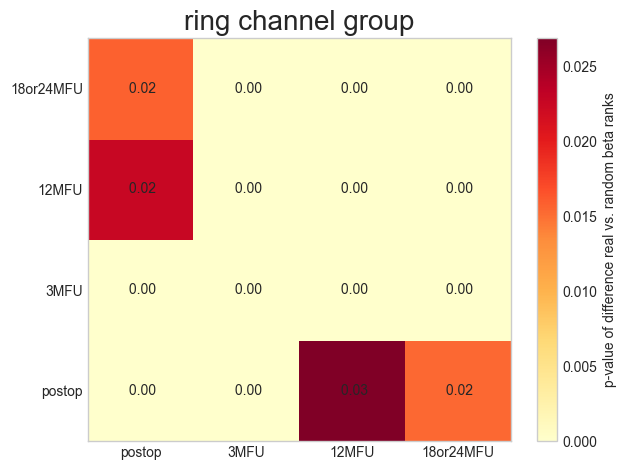

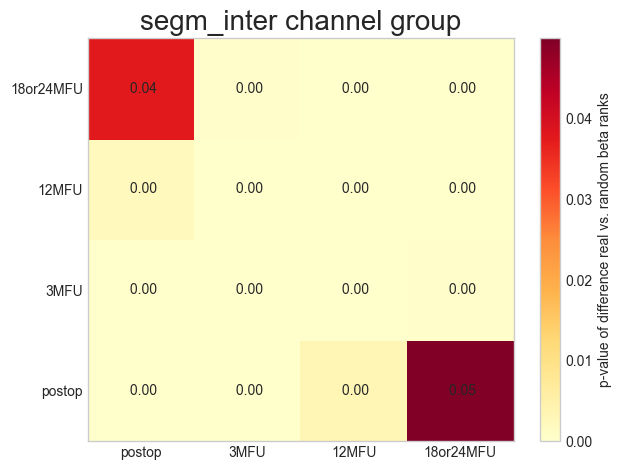

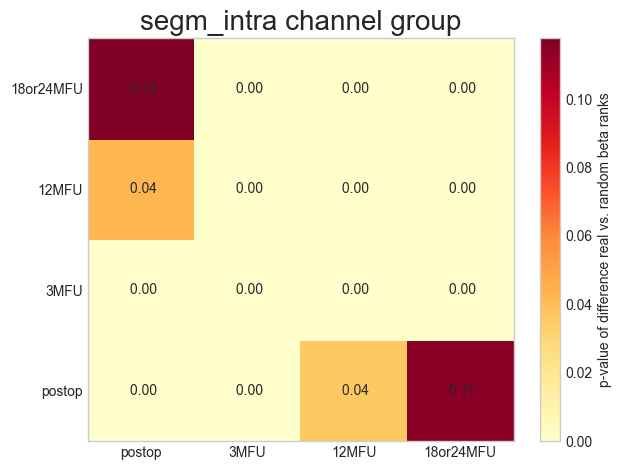

In [12]:
heatmap_permutation = Permute_ranks.heatmap_distances_to_permutated_mean()

In [17]:
# write and load dataframe with beta ranks

beta_rank_DF = writeGroupDF.highest_beta_channels_fooof(
    fooof_spectrum="periodic_spectrum"
)

file:  highest_beta_channels_fooof_periodic_spectrum.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results
file:  beta_ranks_all_channels_fooof_periodic_spectrum.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [18]:
beta_rank_DF = loadResults.load_fooof_beta_ranks(
    fooof_spectrum="periodic_spectrum",
    all_or_one_chan="beta_ranks_all"
)

In [19]:
beta_rank_DF.subject_hemisphere.unique()

array(['017_Right', '017_Left', '019_Right', '019_Left', '021_Right',
       '021_Left', '024_Right', '024_Left', '025_Right', '025_Left',
       '026_Right', '026_Left', '028_Right', '028_Left', '029_Right',
       '029_Left', '030_Right', '030_Left', '031_Right', '031_Left',
       '032_Right', '032_Left', '033_Right', '033_Left', '038_Right',
       '038_Left', '041_Right', '041_Left', '045_Right', '045_Left',
       '059_Right', '059_Left', '060_Right', '060_Left', '061_Right',
       '061_Left', '062_Right', '062_Left', '063_Right', '063_Left'],
      dtype=object)

## 2. Spearman correlation of FOOOF bipolar channel group beta

In [8]:
session_comp_df = Permute_ranks.fooof_beta_write_session_comparison_df(
    fooof_spectrum="periodic_spectrum",
    fooof_version="v2"
)

In [9]:
session_comp_df["ring_fu12m_fu18or24m"].head()

index_x subject_hemisphere_x session_x bipolar_channel_x fooof_error_x  \
0       78            019_Right     fu12m                12      0.060266   
1       79            019_Right     fu12m                01      0.094023   
2       80            019_Right     fu12m                23      0.057768   
3      138             019_Left     fu12m                12      0.070909   
4      139             019_Left     fu12m                01      0.078377   

  fooof_r_sq_x fooof_exponent_x fooof_offset_x  \
0     0.987687           1.6981       1.145361   
1     0.975273         1.696892       1.458768   
2     0.985101         1.673059       1.090091   
3      0.98449         1.392897       0.662548   
4     0.979414         1.584685       1.190315   

                              fooof_power_spectrum_x  \
0  [0.012950008616536834, 0.014041472056847581, 0...   
1  [0.0007106480659935244, 0.000546463919732787, ...   
2  [0.00021342970890536606, 0.000161576543761921,...   
3  [0.003089121346128154, 0.0038713783215709174, ...   
4  [0.0171698386318484, 0.015602382714527963, 0.0...   

                 periodic_plus_aperiodic_power_log_x  ...  \
0  [0.6354861266387861, 0.3379713147107179, 0.128...  ...   
1  [0.9479871840871283, 0.6491977117377478, 0.437...  ...   
2  [0.5864737054415697, 0.2918744315064689, 0.082...  ...   
3  [0.24400962340037685, -0.00034705510112904956,...  ...   
4  [0.7147183106890582, 0.43671445963698075, 0.24...  ...   

                               fooof_periodic_flat_y fooof_number_peaks_y  \
0  [4.741156575441186e-05, 7.114812722962472e-05,...                    4   
1  [8.028888135940596e-05, 0.0007615687796626795,...                    4   
2  [0.002528670970308284, 0.003574873725795071, 0...                    4   
3  [1.0698773641676922e-05, 1.712519058016812e-05...                    3   
4  [4.458260748797837e-05, 6.8431393338063e-05, 0...                    4   

                     alpha_peak_CF_power_bandWidth_y  \
0                                    [nan, nan, nan]   
1  [8.454925996835193, 0.5091363849262899, 3.0000...   
2  [8.921439807919002, 0.3001189042557485, 3.1040...   
3                                    [nan, nan, nan]   
4                                    [nan, nan, nan]   

                  low_beta_peak_CF_power_bandWidth_y  \
0  [19.552229936178627, 0.7607405530928206, 5.185...   
1                                    [nan, nan, nan]   
2  [15.150804978840196, 0.289008821006969, 3.0000...   
3                                    [nan, nan, nan]   
4                                    [nan, nan, nan]   

                 high_beta_peak_CF_power_bandWidth_y  \
0  [30.931263592175252, 0.7362825488793813, 8.986...   
1  [31.197453640562664, 1.2424795982442025, 9.528...   
2  [32.01835179820703, 0.22766338521077567, 19.99...   
3  [30.565746562264074, 0.972017295379391, 8.0576...   
4  [31.624998686061527, 0.8964873136785043, 3.840...   

                      beta_peak_CF_power_bandWidth_y  \
0  [19.552229936178627, 0.7607405530928206, 5.185...   
1  [31.197453640562664, 1.2424795982442025, 9.528...   
2  [20.909455014228165, 0.49660715723074456, 4.97...   
3  [20.691267074232385, 1.002964293551249, 6.3542...   
4  [31.624998686061527, 0.8964873136785043, 3.840...   

  gamma_peak_CF_power_bandWidth_y  beta_average_y  beta_rank_y  \
0                 [nan, nan, nan]        0.154484          2.0   
1                 [nan, nan, nan]        0.712902          1.0   
2                 [nan, nan, nan]        0.049677          3.0   
3                 [nan, nan, nan]        0.217561          1.0   
4                 [nan, nan, nan]        0.130836          3.0   

  abs_difference_ranks  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  1.0  

[5 rows x 40 columns]

/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/ranking/Permutation_rankings.py:1258: RuntimeWarning: divide by zero encountered in arctanh
  fisher_transformation_spearman_r = np.arctanh(spearman_r_list)
/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/ranking/Permutation_rankings.py:1258: RuntimeWarning: divide by zero encountered in arctanh
  fisher_transformation_spearman_r = np.arctanh(spearman_r_list)
/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/ranking/Permutation_rankings.py:1258: RuntimeWarning: divide by zero encountered in arctanh
  fisher_transformation_spearman_r = np.arctanh(spearman_r_list)
/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/ranking/Permutation_rankings.py:1258: RuntimeWarning: divide by zero encountered in arctanh
  fisher_transformation_spearman_r = np.arctanh(spearman_r_list)


file:  periodic_spectrum_bipolar_LFPs_beta_correlations_per_stn_v2.xlsx 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
file:  periodic_spectrum_bipolar_LFPs_beta_correlations_heatmap_mean_v2.pickle 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


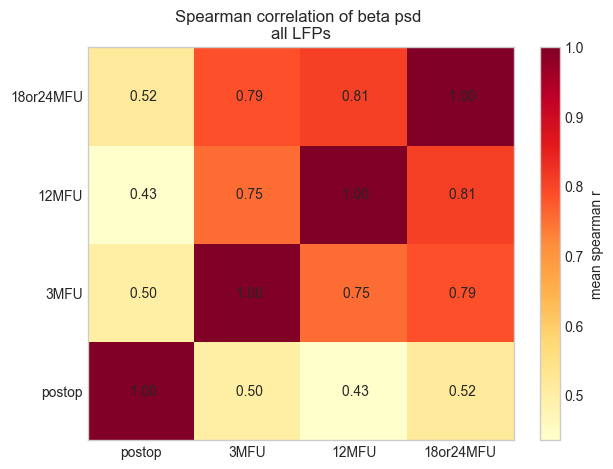

In [19]:
heatmap_spearman_bipolar_beta = Permute_ranks.fooof_bip_channel_groups_beta_spearman(
    fooof_spectrum="periodic_spectrum",
    fooof_version="v2",
    spearman_mean_or_median="mean",
    all_groups_together="yes"
)

In [10]:
heatmap_spearman_bipolar_beta["spearman_result_df"] # v2

comparison channel_group  \
postop_postop_all_LFPs              postop_postop      all_LFPs   
postop_fu3m_all_LFPs                  postop_fu3m      all_LFPs   
postop_fu12m_all_LFPs                postop_fu12m      all_LFPs   
postop_fu18or24m_all_LFPs        postop_fu18or24m      all_LFPs   
fu3m_postop_all_LFPs                  fu3m_postop      all_LFPs   
fu3m_fu3m_all_LFPs                      fu3m_fu3m      all_LFPs   
fu3m_fu12m_all_LFPs                    fu3m_fu12m      all_LFPs   
fu3m_fu18or24m_all_LFPs            fu3m_fu18or24m      all_LFPs   
fu12m_postop_all_LFPs                fu12m_postop      all_LFPs   
fu12m_fu3m_all_LFPs                    fu12m_fu3m      all_LFPs   
fu12m_fu12m_all_LFPs                  fu12m_fu12m      all_LFPs   
fu12m_fu18or24m_all_LFPs          fu12m_fu18or24m      all_LFPs   
fu18or24m_postop_all_LFPs        fu18or24m_postop      all_LFPs   
fu18or24m_fu3m_all_LFPs            fu18or24m_fu3m      all_LFPs   
fu18or24m_fu12m_all_LFPs          fu18or24m_fu12m      all_LFPs   
fu18or24m_fu18or24m_all_LFPs  fu18or24m_fu18or24m      all_LFPs   

                             sample_size_stn  \
postop_postop_all_LFPs                    46   
postop_fu3m_all_LFPs                      30   
postop_fu12m_all_LFPs                     24   
postop_fu18or24m_all_LFPs                 10   
fu3m_postop_all_LFPs                      30   
fu3m_fu3m_all_LFPs                        46   
fu3m_fu12m_all_LFPs                       24   
fu3m_fu18or24m_all_LFPs                   16   
fu12m_postop_all_LFPs                     24   
fu12m_fu3m_all_LFPs                       24   
fu12m_fu12m_all_LFPs                      42   
fu12m_fu18or24m_all_LFPs                  22   
fu18or24m_postop_all_LFPs                 10   
fu18or24m_fu3m_all_LFPs                   16   
fu18or24m_fu12m_all_LFPs                  22   
fu18or24m_fu18or24m_all_LFPs              22   

                             standard_deviation_spearman_values  \
postop_postop_all_LFPs                                      0.0   
postop_fu3m_all_LFPs                                   0.279398   
postop_fu12m_all_LFPs                                  0.357251   
postop_fu18or24m_all_LFPs                              0.320682   
fu3m_postop_all_LFPs                                   0.279398   
fu3m_fu3m_all_LFPs                                          0.0   
fu3m_fu12m_all_LFPs                                    0.201257   
fu3m_fu18or24m_all_LFPs                                0.121198   
fu12m_postop_all_LFPs                                  0.357251   
fu12m_fu3m_all_LFPs                                    0.201257   
fu12m_fu12m_all_LFPs                                        0.0   
fu12m_fu18or24m_all_LFPs                               0.146589   
fu18or24m_postop_all_LFPs                              0.320682   
fu18or24m_fu3m_all_LFPs                                0.121198   
fu18or24m_fu12m_all_LFPs                               0.146589   
fu18or24m_fu18or24m_all_LFPs                                0.0   

                             mean_spearman_values median_spearman_values  \
postop_postop_all_LFPs                        1.0                    1.0   
postop_fu3m_all_LFPs                     0.499569               0.534965   
postop_fu12m_all_LFPs                    0.434588               0.447552   
postop_fu18or24m_all_LFPs                 0.51614               0.590909   
fu3m_postop_all_LFPs                     0.499569               0.534965   
fu3m_fu3m_all_LFPs                            1.0                    1.0   
fu3m_fu12m_all_LFPs                      0.753497               0.832168   
fu3m_fu18or24m_all_LFPs                  0.786713               0.804196   
fu12m_postop_all_LFPs                    0.434588               0.447552   
fu12m_fu3m_all_LFPs                      0.753497               0.832168   
fu12m_fu12m_all_LFPs                          1.0                    1.0   
fu12m_fu18or24m_all_LFPs      

In [8]:
heatmap_spearman_bipolar_beta["spearman_result_df"] # old version

comparison channel_group  \
postop_postop_all_LFPs              postop_postop      all_LFPs   
postop_fu3m_all_LFPs                  postop_fu3m      all_LFPs   
postop_fu12m_all_LFPs                postop_fu12m      all_LFPs   
postop_fu18or24m_all_LFPs        postop_fu18or24m      all_LFPs   
fu3m_postop_all_LFPs                  fu3m_postop      all_LFPs   
fu3m_fu3m_all_LFPs                      fu3m_fu3m      all_LFPs   
fu3m_fu12m_all_LFPs                    fu3m_fu12m      all_LFPs   
fu3m_fu18or24m_all_LFPs            fu3m_fu18or24m      all_LFPs   
fu12m_postop_all_LFPs                fu12m_postop      all_LFPs   
fu12m_fu3m_all_LFPs                    fu12m_fu3m      all_LFPs   
fu12m_fu12m_all_LFPs                  fu12m_fu12m      all_LFPs   
fu12m_fu18or24m_all_LFPs          fu12m_fu18or24m      all_LFPs   
fu18or24m_postop_all_LFPs        fu18or24m_postop      all_LFPs   
fu18or24m_fu3m_all_LFPs            fu18or24m_fu3m      all_LFPs   
fu18or24m_fu12m_all_LFPs          fu18or24m_fu12m      all_LFPs   
fu18or24m_fu18or24m_all_LFPs  fu18or24m_fu18or24m      all_LFPs   

                             sample_size_stn  \
postop_postop_all_LFPs                    38   
postop_fu3m_all_LFPs                      26   
postop_fu12m_all_LFPs                     20   
postop_fu18or24m_all_LFPs                  8   
fu3m_postop_all_LFPs                      26   
fu3m_fu3m_all_LFPs                        42   
fu3m_fu12m_all_LFPs                       24   
fu3m_fu18or24m_all_LFPs                   14   
fu12m_postop_all_LFPs                     20   
fu12m_fu3m_all_LFPs                       24   
fu12m_fu12m_all_LFPs                      38   
fu12m_fu18or24m_all_LFPs                  18   
fu18or24m_postop_all_LFPs                  8   
fu18or24m_fu3m_all_LFPs                   14   
fu18or24m_fu12m_all_LFPs                  18   
fu18or24m_fu18or24m_all_LFPs              18   

                             standard_deviation_spearman_values  \
postop_postop_all_LFPs                                      0.0   
postop_fu3m_all_LFPs                                   0.287752   
postop_fu12m_all_LFPs                                   0.39317   
postop_fu18or24m_all_LFPs                              0.339898   
fu3m_postop_all_LFPs                                   0.287752   
fu3m_fu3m_all_LFPs                                          0.0   
fu3m_fu12m_all_LFPs                                    0.196168   
fu3m_fu18or24m_all_LFPs                                0.109562   
fu12m_postop_all_LFPs                                   0.39317   
fu12m_fu3m_all_LFPs                                    0.196168   
fu12m_fu12m_all_LFPs                                        0.0   
fu12m_fu18or24m_all_LFPs                               0.098838   
fu18or24m_postop_all_LFPs                              0.339898   
fu18or24m_fu3m_all_LFPs                                0.109562   
fu18or24m_fu12m_all_LFPs                               0.098838   
fu18or24m_fu18or24m_all_LFPs                                0.0   

                             mean_spearman_values median_spearman_values  \
postop_postop_all_LFPs                        1.0                    1.0   
postop_fu3m_all_LFPs                     0.509414               0.552448   
postop_fu12m_all_LFPs                    0.409133               0.479438   
postop_fu18or24m_all_LFPs                0.426208               0.414621   
fu3m_postop_all_LFPs                     0.509414               0.552448   
fu3m_fu3m_all_LFPs                            1.0                    1.0   
fu3m_fu12m_all_LFPs                      0.772436               0.874126   
fu3m_fu18or24m_all_LFPs                   0.78929               0.765734   
fu12m_postop_all_LFPs                    0.409133               0.479438   
fu12m_fu3m_all_LFPs                      0.772436               0.874126   
fu12m_fu12m_all_LFPs                          1.0                    1.0   
fu12m_fu18or24m_all_LFPs      

Compare fisher transformed correlation coefficients

/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/ranking/Permutation_rankings.py:1259: RuntimeWarning: divide by zero encountered in arctanh
  fisher_transformation_spearman_r = np.arctanh(spearman_r_list)
/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/ranking/Permutation_rankings.py:1259: RuntimeWarning: divide by zero encountered in arctanh
  fisher_transformation_spearman_r = np.arctanh(spearman_r_list)
/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/ranking/Permutation_rankings.py:1259: RuntimeWarning: divide by zero encountered in arctanh
  fisher_transformation_spearman_r = np.arctanh(spearman_r_list)
/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/ranking/Permutation_rankings.py:1259: RuntimeWarning: divide by zero encountered in arctanh
  fisher_transformation_spearman_r = np.arctanh(spearman_r_list)


file:  periodic_spectrum_bipolar_LFPs_beta_correlations_per_stn_v2.xlsx 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
file:  periodic_spectrum_bipolar_LFPs_beta_correlations_heatmap_mean_v2.pickle 
written in:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
Figures t-test_fisher_transformed_Spearman_coeff_bipolar_periodic_spectrum_v2_all_LFPs.svg and t-test_fisher_transformed_Spearman_coeff_bipolar_periodic_spectrum_v2_all_LFPs.png 
were written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/figures.


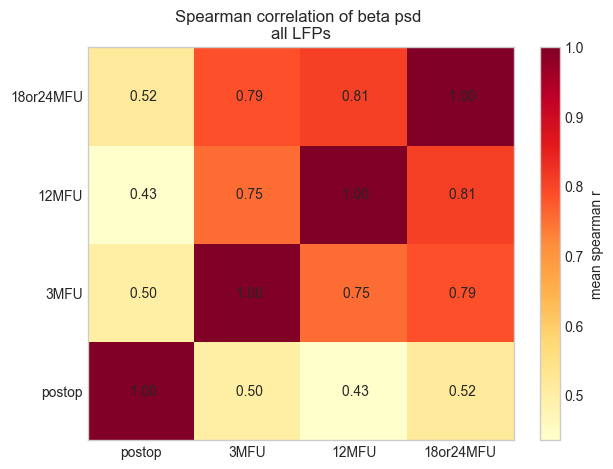

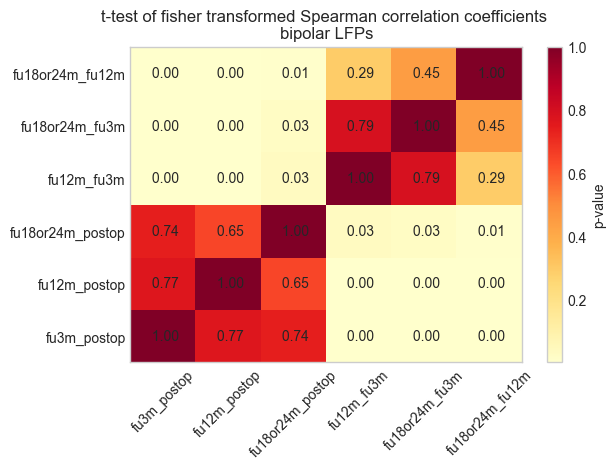

In [3]:
t_test_fisher_coeff = Permute_ranks.t_test_fisher_transformed_correlation_coeff(
    fooof_spectrum="periodic_spectrum",
    fooof_version="v2",
    all_groups_together="yes"
)

In [4]:
t_test_fisher_coeff

comparison_1      comparison_2  \
fu3m_postop_vs_fu12m_postop               fu3m_postop      fu12m_postop   
fu3m_postop_vs_fu18or24m_postop           fu3m_postop  fu18or24m_postop   
fu3m_postop_vs_fu12m_fu3m                 fu3m_postop        fu12m_fu3m   
fu3m_postop_vs_fu18or24m_fu3m             fu3m_postop    fu18or24m_fu3m   
fu3m_postop_vs_fu18or24m_fu12m            fu3m_postop   fu18or24m_fu12m   
fu12m_postop_vs_fu3m_postop              fu12m_postop       fu3m_postop   
fu12m_postop_vs_fu18or24m_postop         fu12m_postop  fu18or24m_postop   
fu12m_postop_vs_fu12m_fu3m               fu12m_postop        fu12m_fu3m   
fu12m_postop_vs_fu18or24m_fu3m           fu12m_postop    fu18or24m_fu3m   
fu12m_postop_vs_fu18or24m_fu12m          fu12m_postop   fu18or24m_fu12m   
fu18or24m_postop_vs_fu3m_postop      fu18or24m_postop       fu3m_postop   
fu18or24m_postop_vs_fu12m_postop     fu18or24m_postop      fu12m_postop   
fu18or24m_postop_vs_fu12m_fu3m       fu18or24m_postop        fu12m_fu3m   
fu18or24m_postop_vs_fu18or24m_fu3m   fu18or24m_postop    fu18or24m_fu3m   
fu18or24m_postop_vs_fu18or24m_fu12m  fu18or24m_postop   fu18or24m_fu12m   
fu12m_fu3m_vs_fu3m_postop                  fu12m_fu3m       fu3m_postop   
fu12m_fu3m_vs_fu12m_postop                 fu12m_fu3m      fu12m_postop   
fu12m_fu3m_vs_fu18or24m_postop             fu12m_fu3m  fu18or24m_postop   
fu12m_fu3m_vs_fu18or24m_fu3m               fu12m_fu3m    fu18or24m_fu3m   
fu12m_fu3m_vs_fu18or24m_fu12m              fu12m_fu3m   fu18or24m_fu12m   
fu18or24m_fu3m_vs_fu3m_postop          fu18or24m_fu3m       fu3m_postop   
fu18or24m_fu3m_vs_fu12m_postop         fu18or24m_fu3m      fu12m_postop   
fu18or24m_fu3m_vs_fu18or24m_postop     fu18or24m_fu3m  fu18or24m_postop   
fu18or24m_fu3m_vs_fu12m_fu3m           fu18or24m_fu3m        fu12m_fu3m   
fu18or24m_fu3m_vs_fu18or24m_fu12m      fu18or24m_fu3m   fu18or24m_fu12m   
fu18or24m_fu12m_vs_fu3m_postop        fu18or24m_fu12m       fu3m_postop   
fu18or24m_fu12m_vs_fu12m_postop       fu18or24m_fu12m      fu12m_postop   
fu18or24m_fu12m_vs_fu18or24m_postop   fu18or24m_fu12m  fu18or24m_postop   
fu18or24m_fu12m_vs_fu12m_fu3m         fu18or24m_fu12m        fu12m_fu3m   
fu18or24m_fu12m_vs_fu18or24m_fu3m     fu18or24m_fu12m    fu18or24m_fu3m   

                                    statistic   p-value  
fu3m_postop_vs_fu12m_postop          0.295943  0.768452  
fu3m_postop_vs_fu18or24m_postop     -0.331534  0.742063  
fu3m_postop_vs_fu12m_fu3m           -3.668155  0.000575  
fu3m_postop_vs_fu18or24m_fu3m       -3.649389  0.000694  
fu3m_postop_vs_fu18or24m_fu12m      -4.639638  0.000025  
fu12m_postop_vs_fu3m_postop         -0.295943  0.768452  
fu12m_postop_vs_fu18or24m_postop    -0.462277  0.647011  
fu12m_postop_vs_fu12m_fu3m          -3.301649  0.001864  
fu12m_postop_vs_fu18or24m_fu3m      -3.192233  0.002833  
fu12m_postop_vs_fu18or24m_fu12m     -4.081676  0.000185  
fu18or24m_postop_vs_fu3m_postop      0.331534  0.742063  
fu18or24m_postop_vs_fu12m_postop     0.462277  0.647011  
fu18or24m_postop_vs_fu12m_fu3m      -2.210457  0.034343  
fu18or24m_postop_vs_fu18or24m_fu3m  -2.380459  0.025579  
fu18or24m_postop_vs_fu18or24m_fu12m -2.913589   0.00669  
fu12m_fu3m_vs_fu3m_postop            3.668155  0.000575  
fu12m_fu3m_vs_fu12m_postop           3.301649  0.001864  
fu12m_fu3m_vs_fu18or24m_postop       2.210457  0.034343  
fu12m_fu3m_vs_fu18or24m_fu3m        -0.264711  0.792662  
fu12m_fu3m_vs_fu18or24m_fu12m       -1.069128  0.290842  
fu18or24m_fu3m_vs_fu3m_postop        3.649389  0.000694  
fu18or24m_fu3m_vs_fu12m_postop       3.192233  0.002833  
fu18or24m_fu3m_vs_fu18or24m_postop   2.380459  0.025579  
fu18or24m_fu3m_vs_fu12m_fu3m         0.264711  0.792662  
fu18or24m_fu3m_vs_fu18or24m_fu12m   -0.771672  0.445345  
fu18or24m_fu12m_vs_fu3m_postop       4.639638  0.000025  
fu18or24m_fu12m_vs_fu12m_postop      4.081676  0.000185  
fu18or24m_fu12m_vs_fu18or24m_postop  2.913589   0.00669  
fu18or24m_fu12m_vs_fu12m_fu3m    

In [23]:
data = heatmap_spearman_bipolar_beta["single_stn_spearman_DF_copy"]

comparisons_list = ["postop_fu3m", "postop_fu12m", "postop_fu18or24m", "fu3m_fu12m", "fu3m_fu18or24m", "fu12m_fu18or24m"]

for comp in comparisons_list:

    comparison = data.loc[data.comparison == comp]
    sample_size = comparison.comparison.count()
    significant = comparison.loc[comparison.significant_correlation == "yes"].comparison.count()
    significant_percent = significant / sample_size

    print(f"{comp}: \nsample size: {sample_size} \nsignificant[%]: {significant_percent}")

postop_fu3m: 
sample size: 26 
significant[%]: 0.46153846153846156
postop_fu12m: 
sample size: 20 
significant[%]: 0.4
postop_fu18or24m: 
sample size: 8 
significant[%]: 0.375
fu3m_fu12m: 
sample size: 24 
significant[%]: 0.875
fu3m_fu18or24m: 
sample size: 14 
significant[%]: 0.9285714285714286
fu12m_fu18or24m: 
sample size: 18 
significant[%]: 0.8888888888888888


In [10]:
heatmap_spearman_bipolar_beta.loc[heatmap_spearman_bipolar_beta.channel_group == "segm_inter"]

comparison channel_group sample_size_stn  \
postop_postop_segm_inter  postop_postop    segm_inter              30   
postop_fu3m_segm_inter      postop_fu3m    segm_inter              26   
postop_fu12m_segm_inter    postop_fu12m    segm_inter              14   
postop_fu18m_segm_inter    postop_fu18m    segm_inter               4   
fu3m_postop_segm_inter      fu3m_postop    segm_inter              26   
fu3m_fu3m_segm_inter          fu3m_fu3m    segm_inter              40   
fu3m_fu12m_segm_inter        fu3m_fu12m    segm_inter              24   
fu3m_fu18m_segm_inter        fu3m_fu18m    segm_inter              10   
fu12m_postop_segm_inter    fu12m_postop    segm_inter              14   
fu12m_fu3m_segm_inter        fu12m_fu3m    segm_inter              24   
fu12m_fu12m_segm_inter      fu12m_fu12m    segm_inter              28   
fu12m_fu18m_segm_inter      fu12m_fu18m    segm_inter              10   
fu18m_postop_segm_inter    fu18m_postop    segm_inter               4   
fu18m_fu3m_segm_inter        fu18m_fu3m    segm_inter              10   
fu18m_fu12m_segm_inter      fu18m_fu12m    segm_inter              10   
fu18m_fu18m_segm_inter      fu18m_fu18m    segm_inter              10   

                         standard_deviation_spearman_values  \
postop_postop_segm_inter                                0.0   
postop_fu3m_segm_inter                             0.524545   
postop_fu12m_segm_inter                            0.480487   
postop_fu18m_segm_inter                                0.75   
fu3m_postop_segm_inter                             0.524545   
fu3m_fu3m_segm_inter                                    0.0   
fu3m_fu12m_segm_inter                              0.343592   
fu3m_fu18m_segm_inter                                  0.25   
fu12m_postop_segm_inter                            0.480487   
fu12m_fu3m_segm_inter                              0.343592   
fu12m_fu12m_segm_inter                                  0.0   
fu12m_fu18m_segm_inter                             0.244949   
fu18m_postop_segm_inter                                0.75   
fu18m_fu3m_segm_inter                                  0.25   
fu18m_fu12m_segm_inter                             0.244949   
fu18m_fu18m_segm_inter                                  0.0   

                         mean_spearman_values median_spearman_values  \
postop_postop_segm_inter                  1.0                    1.0   
postop_fu3m_segm_inter               0.615385                   0.75   
postop_fu12m_segm_inter              0.535714                    0.5   
postop_fu18m_segm_inter                  0.25                   0.25   
fu3m_postop_segm_inter               0.615385                   0.75   
fu3m_fu3m_segm_inter                      1.0                    1.0   
fu3m_fu12m_segm_inter                0.833333                    1.0   
fu3m_fu18m_segm_inter                    0.75                   0.75   
fu12m_postop_segm_inter              0.535714                    0.5   
fu12m_fu3m_segm_inter                0.833333                    1.0   
fu12m_fu12m_segm_inter                    1.0                    1.0   
fu12m_fu18m_segm_inter                    0.8                    1.0   
fu18m_postop_segm_inter                  0.25                   0.25   
fu18m_fu3m_segm_inter                    0.75                   0.75   
fu18m_fu12m_segm_inter                    0.8                    1.0   
fu18m_fu18m_segm_inter                    1.0                    1.0   

                         standard_deviation_pval mean_pval median_pval  \
postop_postop_segm_inter                     0.0       0.0         0.0   
postop_fu3m_segm_inter                  0.332346  0.307692         0.0   
postop_fu12m_segm_inter                 0.319438  0.428571    0.666667   
postop_fu18m_segm_inter                 0.333333  0.333333    0.333333   
fu3m_postop_segm_inter                  0.332346  0.307692         0.0   
fu3m_fu3m_segm_inter                         0

## 3. Spearman correlation of monopolar beta power ranks along electrodes

In [13]:
# automatized method to plot heatmap of spearman correlation between sessions
monopol_spearman_correl = groupMonopol.monopol_psd_correlations_sessions(
    freqBand="beta",
    ranks_or_relPsd="relPsd",
    mean_or_median="mean"
)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results/GroupMonopolar_weightedPsdCoordinateDistance_relToRank1_beta_rawPsd_band-pass.pickle'

In [21]:
monopol_spearman_correl["spearman_m_df"]

session_1 session_2 mean_spearmanr mean_pval
postop_postop_spearman_m    postop    postop            1.0       0.0
postop_fu3m_spearman_m      postop      fu3m       0.507576  0.230012
postop_fu12m_spearman_m     postop     fu12m       0.640873  0.125557
postop_fu18m_spearman_m     postop     fu18m       0.797619  0.020716
fu3m_postop_spearman_m        fu3m    postop       0.507576  0.230012
fu3m_fu3m_spearman_m          fu3m      fu3m            1.0       0.0
fu3m_fu12m_spearman_m         fu3m     fu12m       0.785714  0.084759
fu3m_fu18m_spearman_m         fu3m     fu18m       0.797619  0.095895
fu12m_postop_spearman_m      fu12m    postop       0.640873  0.125557
fu12m_fu3m_spearman_m        fu12m      fu3m       0.785714  0.084759
fu12m_fu12m_spearman_m       fu12m     fu12m            1.0       0.0
fu12m_fu18m_spearman_m       fu12m     fu18m       0.797619  0.056891
fu18m_postop_spearman_m      fu18m    postop       0.797619  0.020716
fu18m_fu3m_spearman_m        fu18m      fu3m       0.797619  0.095895
fu18m_fu12m_spearman_m       fu18m     fu12m       0.797619  0.056891
fu18m_fu18m_spearman_m       fu18m     fu18m            1.0       0.0

In [10]:
# load the monolopar beta psd for for each electrode at different timepoints
data_weightedByCoordinates = loadResults.load_GroupMonoRef_weightedPsdCoordinateDistance_pickle(
    freqBand="beta",
    normalization="rawPsd",
    filterSignal="band-pass"

)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results/GroupMonopolar_weightedPsdCoordinateDistance_relToRank1_beta_rawPsd_band-pass.pickle'

In [10]:
data_weightedByCoordinates.head()

contact   coord_z    coord_xy subject_hemisphere session  \
0       0  0.0+0.0j  0.00+0.00j          017_Right    fu3m   
1       1  2.0+0.0j  0.00+0.00j          017_Right    fu3m   
2       2  4.0+0.0j  0.00+0.00j          017_Right    fu3m   
3       3  6.0+0.0j  0.00+0.00j          017_Right    fu3m   
4      1A  2.0+0.0j  0.65+0.00j          017_Right    fu3m   

   averaged_monopolar_PSD_beta  rank  relativePSD_to_beta_Rank1  
0                     0.206574  10.0                   0.783786  
1                     0.242470   7.0                   0.919984  
2                     0.254409   4.0                   0.965286  
3                     0.263559   1.0                   1.000000  
4                     0.242557   6.0                   0.920316

In [11]:
freqBand="beta"
normalization="rawPsd"
filterSignal="band-pass"

sessions = ["postop", "fu3m", "fu12m", "fu18m"]
contacts = ["0", "1A", "1B", "1C", "2A", "2B", "2C", "3"]

weightedByCoordinate_Dataframe = pd.DataFrame() # concat all Dataframes from all sub, hem, sessions


# first check, which STNs and sessions exist in data 
sub_hem_keys = list(data_weightedByCoordinates.subject_hemisphere.unique())

################## CHOOSE ONLY 8 CONTACTS AND RANK AGAIN ##################
for STN in sub_hem_keys:

    # select only one STN
    STN_data = data_weightedByCoordinates[data_weightedByCoordinates.subject_hemisphere == STN]


    for ses in sessions:

        # first check, if session exists in STN data
        if ses not in STN_data.session.values:
            continue

        
        # get the dataframe per session
        STN_session_data = STN_data[STN_data.session == ses]

        # choose only directional contacts and Ring contacts 0, 3 and rank again only the chosen contacts
        STN_session_data = STN_session_data[STN_session_data["contact"].isin(contacts)]
        STN_session_data["Rank8contacts"] = STN_session_data["averaged_monopolar_PSD_beta"].rank(ascending=False) # ranks 1-8
        STN_session_data_copy = STN_session_data.copy()
        STN_session_data_copy.drop(["rank"], axis=1, inplace=True)

        # calculate the relative PSD to the highest PSD of the 8 remaining contacts
        beta_rank_1 = STN_session_data_copy[STN_session_data_copy["Rank8contacts"] == 1.0] # taking the row containing 1.0 in rank
        beta_rank_1 = beta_rank_1[f"averaged_monopolar_PSD_{freqBand}"].values[0] # just taking psdAverage of rank 1.0

        STN_session_data_copy[f"relativePSD_to_{freqBand}_Rank1from8"] = STN_session_data_copy.apply(lambda row: row[f"averaged_monopolar_PSD_{freqBand}"] / beta_rank_1, axis=1) # in each row add to new value psd/beta_rank1
        STN_session_data_copy.drop([f"relativePSD_to_{freqBand}_Rank1"], axis=1, inplace=True)
        # session_weightedByCoordinates_copy["subject_hemisphere_monoChannel"] = session_weightedByCoordinates_copy[["subject_hemisphere", "monopolarChannels"]].agg("_".join, axis=1)
        

        weightedByCoordinate_Dataframe = pd.concat([weightedByCoordinate_Dataframe, STN_session_data_copy], ignore_index=True)

In [12]:
weightedByCoordinate_Dataframe.head()

contact   coord_z            coord_xy subject_hemisphere session  \
0       0  0.0+0.0j  0.000000+0.000000j          017_Right    fu3m   
1       3  6.0+0.0j  0.000000+0.000000j          017_Right    fu3m   
2      1A  2.0+0.0j  0.650000+0.000000j          017_Right    fu3m   
3      1B  2.0+0.0j -0.325000+0.562917j          017_Right    fu3m   
4      1C  2.0+0.0j -0.325000-0.562917j          017_Right    fu3m   

   averaged_monopolar_PSD_beta  Rank8contacts  relativePSD_to_beta_Rank1from8  
0                     0.206574            8.0                        0.783786  
1                     0.263559            1.0                        1.000000  
2                     0.242557            5.0                        0.920316  
3                     0.235433            7.0                        0.893283  
4                     0.238925            6.0                        0.906535

In [13]:
# get all possible pairs of sessions 
sessions = ["postop", "fu3m", "fu12m", "fu18m"]
# pairs = list(combinations(sessions, 2))
pairs = list(itertools.product(sessions, sessions))


# pairs[0][1]

sub_hem_keys = list(weightedByCoordinate_Dataframe.subject_hemisphere.unique()) # n=13 subjects

# divide Dataframe into 4 session dataframes
# postop_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == "postop")]
# fu3m_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == "fu3m")]
# fu12m_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == "fu12m")]
# fu18m_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == "fu18m")]

# from the list of all existing sub_hem STNs, get only the STNs with existing sessions 1 + 2 
session_pair_STNs = {}

# find session pairs to correlate: check for each pair if subject exists
for p, pair in enumerate(pairs):

    # define session 1 and session 2 to correlate
    session_1 = pair[0]
    session_2 = pair[1]

    session_1_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == session_1)]
    session_2_df = weightedByCoordinate_Dataframe.loc[(weightedByCoordinate_Dataframe.session == session_2)]

    for STN in sub_hem_keys:

        # only run, if sub_hem STN exists in both session Dataframes
        if STN not in session_1_df.subject_hemisphere.values:
            continue

        elif STN not in session_2_df.subject_hemisphere.values:
            continue
        
        # get the rows with the current STN of both sessions: 1 and 2
        STN_session_1 = session_1_df.loc[(session_1_df.subject_hemisphere == STN)]
        STN_session_2 = session_2_df.loc[(session_2_df.subject_hemisphere == STN)]

        # correlate the ranks of session 1 and session 2 of each STN 
        spearman_correlation = stats.spearmanr(STN_session_1.relativePSD_to_beta_Rank1from8.values, STN_session_2.relativePSD_to_beta_Rank1from8.values)


        session_pair_STNs[f"{session_1}_{session_2}_{STN}"] = [session_1, session_2, STN, spearman_correlation.statistic, spearman_correlation.pvalue]

In [14]:
results_DF = pd.DataFrame(session_pair_STNs)
results_DF.rename(index={0: "session_1", 1: "session_2", 2: "subject_hemisphere", 3: "spearman_r", 4: "pval"}, inplace=True)
results_DF = results_DF.transpose()

In [15]:
results_DF.head()

session_1 session_2 subject_hemisphere spearman_r pval
postop_postop_024_Right    postop    postop          024_Right        1.0  0.0
postop_postop_024_Left     postop    postop           024_Left        1.0  0.0
postop_postop_025_Right    postop    postop          025_Right        1.0  0.0
postop_postop_025_Left     postop    postop           025_Left        1.0  0.0
postop_postop_026_Right    postop    postop          026_Right        1.0  0.0

In [16]:
# plot a heat map: x values = session 1 and y values = session 2; color map = r spearman values

spearman_mean = {}

# calculate the MEAN of each session pair
for p, pair in enumerate(pairs):

    # define session 1 and session 2 to correlate
    session_1 = pair[0]
    session_2 = pair[1]

    pairs_df = results_DF.loc[(results_DF.session_1 == session_1)]
    pairs_df = pairs_df.loc[(pairs_df.session_2 == session_2)]

    mean_spearmanr = pairs_df.spearman_r.mean() # take the absolute values
    mean_pval = pairs_df.pval.mean()

    spearman_mean[f"{session_1}_{session_2}_spearman_mean"] = [session_1, session_2, mean_spearmanr, mean_pval]

spearman_df = pd.DataFrame(spearman_mean)
spearman_df.rename(index={0: "session_1", 1: "session_2", 2: "mean_spearmanr", 3: "mean_pval"}, inplace=True)
spearman_df = spearman_df.transpose()

mean_spearmanr = spearman_df.mean_spearmanr.values.astype(float)

In [17]:
spearman_df

session_1 session_2 mean_spearmanr mean_pval
postop_postop_spearman_mean    postop    postop            1.0       0.0
postop_fu3m_spearman_mean      postop      fu3m       0.575893  0.252464
postop_fu12m_spearman_mean     postop     fu12m       0.640873  0.125557
postop_fu18m_spearman_mean     postop     fu18m       0.797619  0.020716
fu3m_postop_spearman_mean        fu3m    postop       0.575893  0.252464
fu3m_fu3m_spearman_mean          fu3m      fu3m            1.0       0.0
fu3m_fu12m_spearman_mean         fu3m     fu12m       0.771164  0.093812
fu3m_fu18m_spearman_mean         fu3m     fu18m       0.797619  0.095895
fu12m_postop_spearman_mean      fu12m    postop       0.640873  0.125557
fu12m_fu3m_spearman_mean        fu12m      fu3m       0.771164  0.093812
fu12m_fu12m_spearman_mean       fu12m     fu12m            1.0       0.0
fu12m_fu18m_spearman_mean       fu12m     fu18m       0.797619  0.056891
fu18m_postop_spearman_mean      fu18m    postop       0.797619  0.020716
fu18m_fu3m_spearman_mean        fu18m      fu3m       0.797619  0.095895
fu18m_fu12m_spearman_mean       fu18m     fu12m       0.797619  0.056891
fu18m_fu18m_spearman_mean       fu18m     fu18m            1.0       0.0

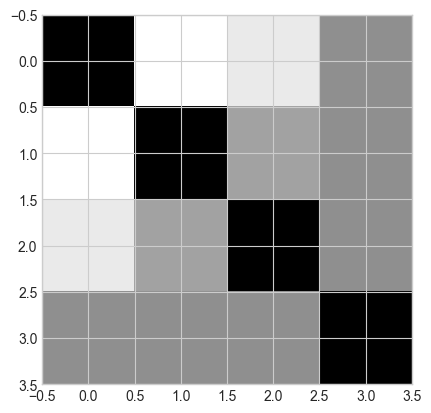

In [18]:
mean_spearmanr = spearman_df.mean_spearmanr.values.astype(float)

plt.imshow(mean_spearmanr.reshape(4,4))

In [19]:
mean_spearmanr.reshape(4,4)

array([[1.        , 0.57589286, 0.64087302, 0.79761905],
       [0.57589286, 1.        , 0.77116402, 0.79761905],
       [0.64087302, 0.77116402, 1.        , 0.79761905],
       [0.79761905, 0.79761905, 0.79761905, 1.        ]])

In [20]:
spearman_heatmap = spearman_df.loc[:, ["session_1", "session_2", "mean_spearmanr"]]
spearman_heatmap

session_1 session_2 mean_spearmanr
postop_postop_spearman_mean    postop    postop            1.0
postop_fu3m_spearman_mean      postop      fu3m       0.575893
postop_fu12m_spearman_mean     postop     fu12m       0.640873
postop_fu18m_spearman_mean     postop     fu18m       0.797619
fu3m_postop_spearman_mean        fu3m    postop       0.575893
fu3m_fu3m_spearman_mean          fu3m      fu3m            1.0
fu3m_fu12m_spearman_mean         fu3m     fu12m       0.771164
fu3m_fu18m_spearman_mean         fu3m     fu18m       0.797619
fu12m_postop_spearman_mean      fu12m    postop       0.640873
fu12m_fu3m_spearman_mean        fu12m      fu3m       0.771164
fu12m_fu12m_spearman_mean       fu12m     fu12m            1.0
fu12m_fu18m_spearman_mean       fu12m     fu18m       0.797619
fu18m_postop_spearman_mean      fu18m    postop       0.797619
fu18m_fu3m_spearman_mean        fu18m      fu3m       0.797619
fu18m_fu12m_spearman_mean       fu18m     fu12m       0.797619
fu18m_fu18m_spearman_mean       fu18m     fu18m            1.0

In [23]:
column_mean = spearman_heatmap.pop("mean_spearmanr")
spearman_heatmap.insert(0, "mean_spearmanr", column_mean)

In [24]:
spearman_heatmap

mean_spearmanr session_1 session_2
postop_postop_spearman_mean            1.0    postop    postop
postop_fu3m_spearman_mean         0.575893    postop      fu3m
postop_fu12m_spearman_mean        0.640873    postop     fu12m
postop_fu18m_spearman_mean        0.797619    postop     fu18m
fu3m_postop_spearman_mean         0.575893      fu3m    postop
fu3m_fu3m_spearman_mean                1.0      fu3m      fu3m
fu3m_fu12m_spearman_mean          0.771164      fu3m     fu12m
fu3m_fu18m_spearman_mean          0.797619      fu3m     fu18m
fu12m_postop_spearman_mean        0.640873     fu12m    postop
fu12m_fu3m_spearman_mean          0.771164     fu12m      fu3m
fu12m_fu12m_spearman_mean              1.0     fu12m     fu12m
fu12m_fu18m_spearman_mean         0.797619     fu12m     fu18m
fu18m_postop_spearman_mean        0.797619     fu18m    postop
fu18m_fu3m_spearman_mean          0.797619     fu18m      fu3m
fu18m_fu12m_spearman_mean         0.797619     fu18m     fu12m
fu18m_fu18m_spearman_mean              1.0     fu18m     fu18m

In [25]:
import plotly.express as px

# data=[[0.575893, 0.640873, 0.797619], [None, 0.771164, 0.797619], [None, None, 0.797619]] # no absolute 
# data = [[0.590774, 0.740079, 0.797619], [1, 0.810847, 0.797619], [0.810847, 1, 0.85]] # Mean of absolute values, 1 manually added for correlation fu3m-fu3m and fu12m-fu12m
data = mean_spearmanr.reshape(4,4)

fig = px.imshow(data,
                labels=dict(x="session 1", y="session 2", color="Mean of spearman correlation"),
                x=['postop', 'fu3m', 'fu12m', 'fu18m'],
                y=['postop', 'fu3m', 'fu12m', 'fu18m'],
               )
fig.update_xaxes(side="top")
fig.show()

In [ ]:
figures_path = find_folders.get_local_path(folder="GroupFigures")

filename = os.path.join(figures_path, "Monopol_session_correlations_heatmap_beta_relPsd_mean")

fig.write_image(filename, format="png")

## 3. FOOOF monopolar beta psd spearman correlation

all contacts included
all contacts included
all contacts included
all contacts included
all contacts included
all contacts included
all contacts included
all contacts included
all contacts included
all contacts included
all contacts included
all contacts included
all contacts included
all contacts included
all contacts included
all contacts included


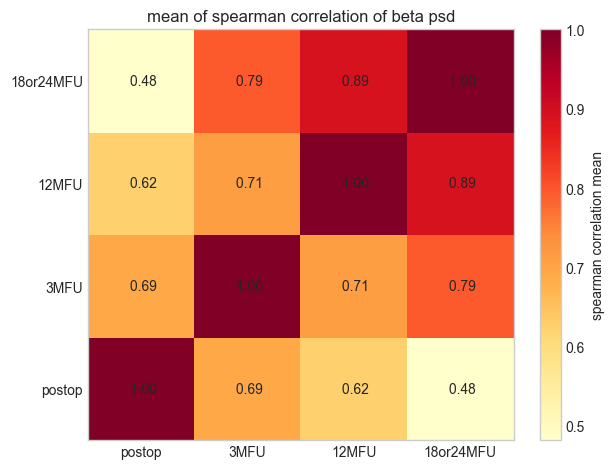

In [7]:
fooof_spearman_correlation = groupMonopol.fooof_monopol_psd_spearman_betw_sessions(
    mean_or_median="mean",
    only_segmental="no",
    values_to_correlate="not_normalized",
    similarity_calculation="inverse_distance",
    fooof_version="v2"
)

# values to correlate: the outcome is the same for all, because spearman uses ranks, which are the same for all variants

In [8]:
# fooof version 2
fooof_spearman_correlation["spearman_m_df"]

session_1  session_2 mean_spearmanr mean_pval  \
postop_postop_spearman_m           postop     postop            1.0       0.0   
postop_fu3m_spearman_m             postop       fu3m       0.694139  0.138201   
postop_fu12m_spearman_m            postop      fu12m        0.62381  0.134242   
postop_fu18or24m_spearman_m        postop  fu18or24m       0.482143  0.243444   
fu3m_postop_spearman_m               fu3m     postop       0.694139  0.138201   
fu3m_fu3m_spearman_m                 fu3m       fu3m            1.0       0.0   
fu3m_fu12m_spearman_m                fu3m      fu12m        0.71131  0.135794   
fu3m_fu18or24m_spearman_m            fu3m  fu18or24m       0.794218  0.097246   
fu12m_postop_spearman_m             fu12m     postop        0.62381  0.134242   
fu12m_fu3m_spearman_m               fu12m       fu3m        0.71131  0.135794   
fu12m_fu12m_spearman_m              fu12m      fu12m            1.0       0.0   
fu12m_fu18or24m_spearman_m          fu12m  fu18or24m       0.888889  0.029898   
fu18or24m_postop_spearman_m     fu18or24m     postop       0.482143  0.243444   
fu18or24m_fu3m_spearman_m       fu18or24m       fu3m       0.794218  0.097246   
fu18or24m_fu12m_spearman_m      fu18or24m      fu12m       0.888889  0.029898   
fu18or24m_fu18or24m_spearman_m  fu18or24m  fu18or24m            1.0       0.0   

                               spearman_std  
postop_postop_spearman_m                0.0  
postop_fu3m_spearman_m             0.343493  
postop_fu12m_spearman_m             0.45085  
postop_fu18or24m_spearman_m         0.43166  
fu3m_postop_spearman_m             0.343493  
fu3m_fu3m_spearman_m                    0.0  
fu3m_fu12m_spearman_m              0.344232  
fu3m_fu18or24m_spearman_m          0.321788  
fu12m_postop_spearman_m             0.45085  
fu12m_fu3m_spearman_m              0.344232  
fu12m_fu12m_spearman_m                  0.0  
fu12m_fu18or24m_spearman_m         0.159324  
fu18or24m_postop_spearman_m         0.43166  
fu18or24m_fu3m_spearman_m          0.321788  
fu18or24m_fu12m_spearman_m         0.159324  
fu18or24m_fu18or24m_spearman_m          0.0

In [9]:
fooof_spearman_correlation["spearman_m_df"]

session_1  session_2 mean_spearmanr mean_pval  \
postop_postop_spearman_m           postop     postop            1.0       0.0   
postop_fu3m_spearman_m             postop       fu3m       0.694139  0.138201   
postop_fu12m_spearman_m            postop      fu12m        0.62381  0.134242   
postop_fu18or24m_spearman_m        postop  fu18or24m       0.482143  0.243444   
fu3m_postop_spearman_m               fu3m     postop       0.694139  0.138201   
fu3m_fu3m_spearman_m                 fu3m       fu3m            1.0       0.0   
fu3m_fu12m_spearman_m                fu3m      fu12m        0.71131  0.135794   
fu3m_fu18or24m_spearman_m            fu3m  fu18or24m       0.794218  0.097246   
fu12m_postop_spearman_m             fu12m     postop        0.62381  0.134242   
fu12m_fu3m_spearman_m               fu12m       fu3m        0.71131  0.135794   
fu12m_fu12m_spearman_m              fu12m      fu12m            1.0       0.0   
fu12m_fu18or24m_spearman_m          fu12m  fu18or24m       0.888889  0.029898   
fu18or24m_postop_spearman_m     fu18or24m     postop       0.482143  0.243444   
fu18or24m_fu3m_spearman_m       fu18or24m       fu3m       0.794218  0.097246   
fu18or24m_fu12m_spearman_m      fu18or24m      fu12m       0.888889  0.029898   
fu18or24m_fu18or24m_spearman_m  fu18or24m  fu18or24m            1.0       0.0   

                               spearman_std  
postop_postop_spearman_m                0.0  
postop_fu3m_spearman_m             0.343493  
postop_fu12m_spearman_m             0.45085  
postop_fu18or24m_spearman_m         0.43166  
fu3m_postop_spearman_m             0.343493  
fu3m_fu3m_spearman_m                    0.0  
fu3m_fu12m_spearman_m              0.344232  
fu3m_fu18or24m_spearman_m          0.321788  
fu12m_postop_spearman_m             0.45085  
fu12m_fu3m_spearman_m              0.344232  
fu12m_fu12m_spearman_m                  0.0  
fu12m_fu18or24m_spearman_m         0.159324  
fu18or24m_postop_spearman_m         0.43166  
fu18or24m_fu3m_spearman_m          0.321788  
fu18or24m_fu12m_spearman_m         0.159324  
fu18or24m_fu18or24m_spearman_m          0.0

In [21]:
fooof_spearman_correlation["sample_size_df"]

session_comparison sample_size
postop_postop              postop_postop          38
postop_fu3m                  postop_fu3m          26
postop_fu12m                postop_fu12m          20
postop_fu18or24m        postop_fu18or24m           8
fu3m_postop                  fu3m_postop          26
fu3m_fu3m                      fu3m_fu3m          42
fu3m_fu12m                    fu3m_fu12m          24
fu3m_fu18or24m            fu3m_fu18or24m          14
fu12m_postop                fu12m_postop          20
fu12m_fu3m                    fu12m_fu3m          24
fu12m_fu12m                  fu12m_fu12m          38
fu12m_fu18or24m          fu12m_fu18or24m          18
fu18or24m_postop        fu18or24m_postop           8
fu18or24m_fu3m            fu18or24m_fu3m          14
fu18or24m_fu12m          fu18or24m_fu12m          18
fu18or24m_fu18or24m  fu18or24m_fu18or24m          18

In [10]:
fooof_spearman_correlation["results_DF"].head()

session_comparison subject_hemisphere spearman_r  \
postop_fu3m_024_Left         postop_fu3m           024_Left        1.0   
postop_fu3m_024_Right        postop_fu3m          024_Right  -0.095238   
postop_fu3m_025_Left         postop_fu3m           025_Left    0.97619   
postop_fu3m_025_Right        postop_fu3m          025_Right   0.904762   
postop_fu3m_029_Left         postop_fu3m           029_Left    0.97619   

                           pval significant_correlation  
postop_fu3m_024_Left        0.0                     yes  
postop_fu3m_024_Right  0.822505                      no  
postop_fu3m_025_Left   0.000033                     yes  
postop_fu3m_025_Right  0.002008                     yes  
postop_fu3m_029_Left   0.000033                     yes

In [11]:
# sample size and percentage how often significant spearman

data = fooof_spearman_correlation["results_DF"]

comparisons_list = ["postop_fu3m", "postop_fu12m", "postop_fu18or24m", "fu3m_fu12m", "fu3m_fu18or24m", "fu12m_fu18or24m"]

for comp in comparisons_list:

    comparison = data.loc[data.session_comparison == comp]
    sample_size = comparison.session_comparison.count()
    significant = comparison.loc[comparison.significant_correlation == "yes"].session_comparison.count()
    significant_percent = significant / sample_size

    print(f"{comp}: \nsample size: {sample_size} \nsignificant[%]: {significant_percent}")

postop_fu3m: 
sample size: 26 
significant[%]: 0.6538461538461539
postop_fu12m: 
sample size: 20 
significant[%]: 0.65
postop_fu18or24m: 
sample size: 8 
significant[%]: 0.375
fu3m_fu12m: 
sample size: 24 
significant[%]: 0.6666666666666666
fu3m_fu18or24m: 
sample size: 14 
significant[%]: 0.7857142857142857
fu12m_fu18or24m: 
sample size: 18 
significant[%]: 0.9444444444444444


T TEST OF FISHER TRANSFORMED SPEARMAN CORRELATIONS

Excel file loaded:  fooof_monopol_inverse_distance_beta_correlations_per_stn_v2.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
p-value:  0.8875722335775306
p-value:  0.5027350160121793
p-value:  0.5630226460433456
p-value:  0.044856024220405036
p-value:  0.010087580463779729
p-value:  0.8875722335775306
p-value:  0.6099455475207152
p-value:  0.5179198198501838
p-value:  0.05789575497868008
p-value:  0.014451832252092438
p-value:  0.5027350160121793
p-value:  0.6099455475207152
p-value:  0.3278589070266392
p-value:  0.07290011707392753
p-value:  0.015550566750642862
p-value:  0.5630226460433456
p-value:  0.5179198198501838
p-value:  0.3278589070266392
p-value:  0.14957872387563195
p-value:  0.06313528034197613
p-value:  0.044856024220405036
p-value:  0.05789575497868008
p-value:  0.07290011707392753
p-value:  0.14957872387563195
p-value:  0.9611823135493323
p-value:  0.010087580463779729
p-value:  0.014451832252092438
p-value:  0.015

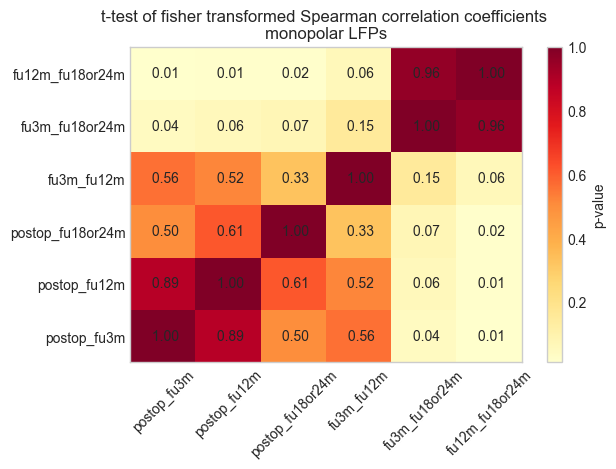

In [25]:
spearman_df = groupMonopol.t_test_fisher_transformed_spearman_monopolar(
    similarity_calculation="inverse_distance",
    fooof_version="v2",
)

In [26]:
spearman_df[1]

comparison_1      comparison_2  \
postop_fu3m_vs_postop_fu12m               postop_fu3m      postop_fu12m   
postop_fu3m_vs_postop_fu18or24m           postop_fu3m  postop_fu18or24m   
postop_fu3m_vs_fu3m_fu12m                 postop_fu3m        fu3m_fu12m   
postop_fu3m_vs_fu3m_fu18or24m             postop_fu3m    fu3m_fu18or24m   
postop_fu3m_vs_fu12m_fu18or24m            postop_fu3m   fu12m_fu18or24m   
postop_fu12m_vs_postop_fu3m              postop_fu12m       postop_fu3m   
postop_fu12m_vs_postop_fu18or24m         postop_fu12m  postop_fu18or24m   
postop_fu12m_vs_fu3m_fu12m               postop_fu12m        fu3m_fu12m   
postop_fu12m_vs_fu3m_fu18or24m           postop_fu12m    fu3m_fu18or24m   
postop_fu12m_vs_fu12m_fu18or24m          postop_fu12m   fu12m_fu18or24m   
postop_fu18or24m_vs_postop_fu3m      postop_fu18or24m       postop_fu3m   
postop_fu18or24m_vs_postop_fu12m     postop_fu18or24m      postop_fu12m   
postop_fu18or24m_vs_fu3m_fu12m       postop_fu18or24m        fu3m_fu12m   
postop_fu18or24m_vs_fu3m_fu18or24m   postop_fu18or24m    fu3m_fu18or24m   
postop_fu18or24m_vs_fu12m_fu18or24m  postop_fu18or24m   fu12m_fu18or24m   
fu3m_fu12m_vs_postop_fu3m                  fu3m_fu12m       postop_fu3m   
fu3m_fu12m_vs_postop_fu12m                 fu3m_fu12m      postop_fu12m   
fu3m_fu12m_vs_postop_fu18or24m             fu3m_fu12m  postop_fu18or24m   
fu3m_fu12m_vs_fu3m_fu18or24m               fu3m_fu12m    fu3m_fu18or24m   
fu3m_fu12m_vs_fu12m_fu18or24m              fu3m_fu12m   fu12m_fu18or24m   
fu3m_fu18or24m_vs_postop_fu3m          fu3m_fu18or24m       postop_fu3m   
fu3m_fu18or24m_vs_postop_fu12m         fu3m_fu18or24m      postop_fu12m   
fu3m_fu18or24m_vs_postop_fu18or24m     fu3m_fu18or24m  postop_fu18or24m   
fu3m_fu18or24m_vs_fu3m_fu12m           fu3m_fu18or24m        fu3m_fu12m   
fu3m_fu18or24m_vs_fu12m_fu18or24m      fu3m_fu18or24m   fu12m_fu18or24m   
fu12m_fu18or24m_vs_postop_fu3m        fu12m_fu18or24m       postop_fu3m   
fu12m_fu18or24m_vs_postop_fu12m       fu12m_fu18or24m      postop_fu12m   
fu12m_fu18or24m_vs_postop_fu18or24m   fu12m_fu18or24m  postop_fu18or24m   
fu12m_fu18or24m_vs_fu3m_fu12m         fu12m_fu18or24m        fu3m_fu12m   
fu12m_fu18or24m_vs_fu3m_fu18or24m     fu12m_fu18or24m    fu3m_fu18or24m   

                                                                   fisher_comparison_1  \
postop_fu3m_vs_postop_fu12m          [2.6466524123622457, -0.07155042182033666, 2.2...   
postop_fu3m_vs_postop_fu18or24m      [2.6466524123622457, -0.07155042182033666, 2.2...   
postop_fu3m_vs_fu3m_fu12m            [2.6466524123622457, -0.07155042182033666, 2.2...   
postop_fu3m_vs_fu3m_fu18or24m        [2.6466524123622457, -0.07155042182033666, 2.2...   
postop_fu3m_vs_fu12m_fu18or24m       [2.6466524123622457, -0.07155042182033666, 2.2...   
postop_fu12m_vs_postop_fu3m          [2.6466524123622457, -0.34657359027997275, 1.8...   
postop_fu12m_vs_postop_fu18or24m     [2.6466524123622457, -0.34657359027997275, 1.8...   
postop_fu12m_vs_fu3m_fu12m           [2.6466524123622457, -0.34657359027997275, 1.8...   
postop_fu12m_vs_fu3m_fu18or24m       [2.6466524123622457, -0.34657359027997275, 1.8...   
postop_fu12m_vs_fu12m_fu18or24m      [2.6466524123622457, -0.34657359027997275, 1.8...   
postop_fu18or24m_vs_postop_fu3m      [2.6466524123622457, 0.11961484453291713, 0.76...   
postop_fu18or24m_vs_postop_fu12m     [2.6466524123622457, 0.11961484453291713, 0.76...   
postop_fu18or24m_vs_fu3m_fu12m       [2.6466524123622457, 0.11961484453291713, 0.76...   
postop_fu18or24m_vs_fu3m_fu18or24m   [2.6466524123622457, 0.11961484453291713, 0.76...   
postop_fu18or24m_vs_fu12m_fu18or24m  [2.6466524123622457, 0.11961484453291713, 0.76...   
fu3m_fu12m_vs_postop_fu3m            [0.24275390789085044, 0.45814536593707755, 2.6...   
fu3m_fu12m_vs_postop_fu12m           [0.24275390789085044, 0.45814536593707755, 2.6...   
fu3m_fu12m_vs_postop_fu18or24m       [0.24275390789085044, 0.45814536593707755, 2.6...   
fu3m_

Write the dataframe with all relevant FOOOF monopolar beta values for all contacts!

In [23]:
write_monoRef_weighted_all_contacts = MonoRefWeightedCoordinateDistance.fooof_monoRef_weight_psd_by_distance_all_contacts(
    similarity_calculation="inverse_distance"
)

New file: fooof_monoRef_only_segmental_weight_beta_psd_by_inverse_distance_periodic_spectrum.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


New file: fooof_monoRef_segments_and_rings_weight_beta_psd_by_inverse_distance_periodic_spectrum.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
New file: fooof_monoRef_all_contacts_weight_beta_psd_by_inverse_distance.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [57]:
loaded_fooof_monopolar = loadResults.load_fooof_monoRef_all_contacts_weight_beta()

In [101]:
loaded_fooof_monopolar.head(
)

index   coord_z            coord_xy session subject_hemisphere  \
0    246  2.0+0.0j  0.650000+0.000000j    fu3m           017_Left   
1    247  2.0+0.0j -0.325000+0.562917j    fu3m           017_Left   
2    248  2.0+0.0j -0.325000-0.562917j    fu3m           017_Left   
3    249  4.0+0.0j  0.650000+0.000000j    fu3m           017_Left   
4    250  4.0+0.0j -0.325000+0.562917j    fu3m           017_Left   

   estimated_monopolar_beta_psd contact  rank_8  beta_psd_rel_to_rank1  \
0                      0.169303      1A     4.0               0.806348   
1                      0.160857      1B     6.0               0.766122   
2                      0.166701      1C     5.0               0.793957   
3                      0.209962      2A     1.0               1.000000   
4                      0.184677      2B     3.0               0.879570   

   beta_psd_rel_range_0_to_1  
0                   0.737050  
1                   0.682429  
2                   0.720224  
3                   1.000000  
4                   0.836474

In [8]:
loaded_fooof_monopolar = loadResults.load_fooof_monopolar_weighted_psd(
    fooof_spectrum="periodic_spectrum",
    segmental="yes",
    similarity_calculation="inverse_distance"
    )

In [11]:
loaded_fooof_monopolar["fu12m_monopolar_Dataframe"].head()

coord_z            coord_xy session subject_hemisphere  \
1A  2.0+0.0j  0.650000+0.000000j   fu12m          017_Right   
1B  2.0+0.0j -0.325000+0.562917j   fu12m          017_Right   
1C  2.0+0.0j -0.325000-0.562917j   fu12m          017_Right   
2A  4.0+0.0j  0.650000+0.000000j   fu12m          017_Right   
2B  4.0+0.0j -0.325000+0.562917j   fu12m          017_Right   

    estimated_monopolar_beta_psd contact  rank  
1A                      0.489808      1A   4.0  
1B                      0.438298      1B   6.0  
1C                      0.479139      1C   5.0  
2A                      0.585907      2A   2.0  
2B                      0.553675      2B   3.0

## 4. Quantify the change of levels and directions of monopolar beta ranks

Method to quantify and plot differenes of levels of ranks from 1-8 across electrodes

In [27]:
level_difference_df = groupMonopol.mono_rank_differences(
    freq_band="beta",
    normalization="rawPsd",
    filter_signal="band-pass",
    level_or_direction="direction"
)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results/GroupMonopolar_weightedPsdCoordinateDistance_relToRank1_beta_rawPsd_band-pass.pickle'

In [88]:
level_difference_df.head()

session_comparison session_1 session_2 subject_hemisphere  \
0_0_024_Right_1                0_0         0         0          024_Right   
0_0_024_Right_2                0_0         0         0          024_Right   
0_0_024_Right_3                0_0         0         0          024_Right   
0_0_024_Right_4                0_0         0         0          024_Right   
0_0_024_Right_5                0_0         0         0          024_Right   

                rank direction_session_1 direction_session_2  \
0_0_024_Right_1    1                   A                   A   
0_0_024_Right_2    2                   B                   B   
0_0_024_Right_3    3                   C                   C   
0_0_024_Right_4    4                   A                   A   
0_0_024_Right_5    5                   B                   B   

                direction_difference  
0_0_024_Right_1                    0  
0_0_024_Right_2                    0  
0_0_024_Right_3                    0  
0_0_024_Right_4                    0  
0_0_024_Right_5                    0

In [60]:
# filter only ranks 1,2,3
ranks_included = [1,2,3]
ranks_1_2_3 = level_difference_df[level_difference_df["rank"].isin(ranks_included)]
ranks_1_2_3.head()

session_comparison session_1 session_2 subject_hemisphere  \
0_0_024_Right_1                0_0         0         0          024_Right   
0_0_024_Right_2                0_0         0         0          024_Right   
0_0_024_Right_3                0_0         0         0          024_Right   
0_0_024_Left_1                 0_0         0         0           024_Left   
0_0_024_Left_2                 0_0         0         0           024_Left   

                rank level_session_1 level_session_2 level_abs_difference  
0_0_024_Right_1    1               0               0                    0  
0_0_024_Right_2    2               1               1                    0  
0_0_024_Right_3    3               1               1                    0  
0_0_024_Left_1     1               1               1                    0  
0_0_024_Left_2     2               1               1                    0

In [29]:
session = [0, 3, 12, 18]
pairs = list(itertools.product(session, session))
pairs

16

Calculate the percentage of 0, 1, 2 and 3 differences per session comparison

In [7]:
mono_rank_level_difference_heatmap = groupMonopol.mono_rank_difference_heatmap(
    freq_band="beta",
    normalization="rawPsd",
    filter_signal="band-pass",
    ranks_included=[1, 2],
    difference_to_plot="0",
    level_or_direction="direction",
    only_segmental="no"
)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results/GroupMonopolar_weightedPsdCoordinateDistance_relToRank1_beta_rawPsd_band-pass.pickle'

In [51]:
mono_rank_level_difference_heatmap["description_results"]

session_comparison number_of_observations number_of_stn      mean  \
0_0                  0_0                     24            24       0.0   
0_3                  0_3                     22            22  0.181818   
0_12                0_12                     12            12       0.0   
0_18                0_18                      4             4      0.25   
3_0                  3_0                     22            22  0.181818   
3_3                  3_3                     32            32       0.0   
3_12                3_12                     20            20      0.15   
3_18                3_18                     10            10       0.1   
12_0                12_0                     12            12       0.0   
12_3                12_3                     20            20      0.15   
12_12              12_12                     22            22       0.0   
12_18              12_18                     10            10       0.2   
18_0                18_0                      4             4      0.25   
18_3                18_3                     10            10       0.1   
18_12              18_12                     10            10       0.2   
18_18              18_18                     10            10       0.0   

      standard_deviation  
0_0                  0.0  
0_3             0.385695  
0_12                 0.0  
0_18            0.433013  
3_0             0.385695  
3_3                  0.0  
3_12            0.357071  
3_18                 0.3  
12_0                 0.0  
12_3            0.357071  
12_12                0.0  
12_18                0.4  
18_0            0.433013  
18_3                 0.3  
18_12                0.4  
18_18                0.0

In [32]:
mono_rank_level_difference_heatmap["description_results"]

session_comparison number_of_observations number_of_stn mean  \
0_0                  0_0                     72            24    0   
0_3                  0_3                     66            22    0   
0_12                0_12                     36            12    0   
0_18                0_18                     12             4    0   
3_0                  3_0                     66            22    0   
3_3                  3_3                     96            32    0   
3_12                3_12                     60            20    0   
3_18                3_18                     30            10    0   
12_0                12_0                     36            12    0   
12_3                12_3                     60            20    0   
12_12              12_12                     66            22    0   
12_18              12_18                     30            10    0   
18_0                18_0                     12             4    0   
18_3                18_3                     30            10    0   
18_12              18_12                     30            10    0   
18_18              18_18                     30            10    0   

      standard_deviation  
0_0                  0.0  
0_3             0.608518  
0_12            0.595119  
0_18            0.372678  
3_0             0.608518  
3_3                  0.0  
3_12            0.478423  
3_18            0.442217  
12_0            0.595119  
12_3            0.478423  
12_12                0.0  
12_18           0.442217  
18_0            0.372678  
18_3            0.442217  
18_12           0.442217  
18_18                0.0

In [21]:
comparisons = ["0_0", "0_3", "0_12", "0_18", 
                    "3_0", "3_3", "3_12", "3_18", 
                    "12_0", "12_3", "12_12", "12_18",
                    "18_0", "18_3", "18_12", "18_18"]

session_comparison_level_difference_dict = {}

for comp in comparisons:

    comp_dataframe = level_difference_df.loc[level_difference_df.session_comparison == comp]
    session_1 = comp_dataframe.session_1.values[0]
    session_2 = comp_dataframe.session_2.values[0]

    # quantify percentage of how often differences occur
    total_rank_comparisons = comp_dataframe["level_abs_difference"].count()

    # check if numbers exist for each difference value
    if 0 not in comp_dataframe["level_abs_difference"].values:
        count_0 = 0
    else: 
        count_0 = comp_dataframe["level_abs_difference"].value_counts()[0]

    
    if 1 not in comp_dataframe["level_abs_difference"].values:
        count_1 = 0
    else: 
        count_1 = comp_dataframe["level_abs_difference"].value_counts()[1]


    if 2 not in comp_dataframe["level_abs_difference"].values:
        count_2 = 0
    else: 
        count_2 = comp_dataframe["level_abs_difference"].value_counts()[2]

    
    if 3 not in comp_dataframe["level_abs_difference"].values:
        count_3 = 0
    else: 
        count_3 = comp_dataframe["level_abs_difference"].value_counts()[3]

    count_1_or_less = count_0 + count_1
    count_more_than_1 = count_2 + count_3

    # relative values to total rank comparisons
    rel_0 = count_0 / total_rank_comparisons
    rel_1 = count_1 / total_rank_comparisons
    rel_2 = count_2 / total_rank_comparisons
    rel_3 = count_3 / total_rank_comparisons

    rel_1_or_less = count_1_or_less / total_rank_comparisons
    rel_more_than_1 = count_more_than_1 / total_rank_comparisons

    # save in a dict
    session_comparison_level_difference_dict[f"{comp}"] = [comp, session_1, session_2, total_rank_comparisons, 
                                                           rel_0, rel_1, rel_2, rel_3, rel_1_or_less, rel_more_than_1]
    

# transform to dataframe
session_comparison_level_difference_df = pd.DataFrame(session_comparison_level_difference_dict)
session_comparison_level_difference_df.rename(index={
    0: "session_comparison",
    1: "session_1",
    2: "session_2", 
    3: "total_rank_comparisons",
    4: "rel_amount_difference_0",
    5: "rel_amount_difference_1",
    6: "rel_amount_difference_2",
    7: "rel_amount_difference_3",
    8: "rel_amount_difference_1_or_less",
    9: "rel_amount_difference_more_than_1",
}, inplace=True)
session_comparison_level_difference_df = session_comparison_level_difference_df.transpose()


In [35]:
session_comparison_level_difference_df

session_comparison session_1 session_2 total_rank_comparisons  \
0_0                  0_0         0         0                    192   
0_3                  0_3         0         3                    176   
0_12                0_12         0        12                     96   
0_18                0_18         0        18                     32   
3_0                  3_0         3         0                    176   
3_3                  3_3         3         3                    256   
3_12                3_12         3        12                    160   
3_18                3_18         3        18                     80   
12_0                12_0        12         0                     96   
12_3                12_3        12         3                    160   
12_12              12_12        12        12                    176   
12_18              12_18        12        18                     80   
18_0                18_0        18         0                     32   
18_3                18_3        18         3                     80   
18_12              18_12        18        12                     80   
18_18              18_18        18        18                     80   

      rel_amount_difference_0 rel_amount_difference_1 rel_amount_difference_2  \
0_0                       1.0                     0.0                     0.0   
0_3                  0.494318                0.352273                0.096591   
0_12                 0.614583                0.229167                0.135417   
0_18                  0.71875                   0.125                 0.15625   
3_0                  0.494318                0.352273                0.096591   
3_3                       1.0                     0.0                     0.0   
3_12                     0.75                 0.18125                    0.05   
3_18                    0.725                   0.175                   0.075   
12_0                 0.614583                0.229167                0.135417   
12_3                     0.75                 0.18125                    0.05   
12_12                     1.0                     0.0                     0.0   
12_18                  0.7375                  0.1875                  0.0625   
18_0                  0.71875                   0.125                 0.15625   
18_3                    0.725                   0.175                   0.075   
18_12                  0.7375                  0.1875                  0.0625   
18_18                     1.0                     0.0                     0.0   

      rel_amount_difference_3 rel_amount_difference_1_or_less  \
0_0                       0.0                             1.0   
0_3                  0.056818                        0.846591   
0_12                 0.020833                         0.84375   
0_18                      0.0                         0.84375   
3_0                  0.056818                        0.846591   
3_3                       0.0                             1.0   
3_12                  0.01875                         0.93125   
3_18                    0.025                             0.9   
12_0                 0.020833                         0.84375   
12_3                  0.01875                         0.93125   
12_12                     0.0                             1.0   
12_18                  0.0125                           0.925   
18_0                      0.0                         0.84375   
18_3                    0.025                             0.9   
18_12                  0.0125                           0.925   
18_18                     0.0                             1.0   

      rel_amount_difference_more_than_1  
0_0                                 0.0  
0_3                            0.153409  
0_12                            0.15625  
0_18                            0.15625  
3_0                            0.153409  
3_3                                 0.0  
3_12                

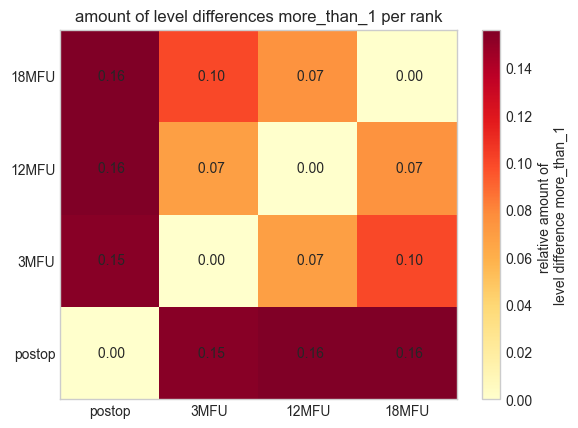

In [66]:
# plot heatmap
difference = "more_than_1"

# transform difference values to floats and 4x4 matrices
if difference == "1_or_less":
    difference_to_plot = session_comparison_level_difference_df.rel_amount_difference_1_or_less.values.astype(float)
    # reshape the mean of spearman r values into 4x4 matrix
    difference_to_plot = difference_to_plot.reshape(4,4)

elif difference == "more_than_1":
    difference_to_plot = session_comparison_level_difference_df.rel_amount_difference_more_than_1.values.astype(float)
    # reshape the medians of spearman r values into 4x4 matrix
    difference_to_plot = difference_to_plot.reshape(4,4)


fig, ax = plt.subplots()

heatmap = ax.pcolor(difference_to_plot, cmap=plt.cm.YlOrRd)
# other color options: GnBu, YlOrRd, YlGn, Greys, Blues, PuBuGn, YlGnBu

# Set the x and y ticks to show the indices of the matrix
ax.set_xticks(np.arange(difference_to_plot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(difference_to_plot.shape[0])+0.5, minor=False)

# Set the tick labels to show the values of the matrix
ax.set_xticklabels(["postop", "3MFU", "12MFU", "18MFU"], minor=False)
ax.set_yticklabels(["postop", "3MFU", "12MFU", "18MFU"], minor=False)

# Rotate the x-axis tick labels to be vertical
# plt.xticks(rotation=90)

# Add a colorbar to the right of the heatmap
cbar = plt.colorbar(heatmap)
cbar.set_label(f"relative amount of \nlevel difference {difference}")

# Add the cell values to the heatmap
for i in range(difference_to_plot.shape[0]):
    for j in range(difference_to_plot.shape[1]):
        plt.text(j + 0.5, i + 0.5, str("{: .2f}".format(difference_to_plot[i, j])), ha='center', va='center') # only show 2 numbers after the comma of a float

# Add a title
plt.title(f"amount of level differences {difference} per rank")

# Show the plot
plt.show()



Write new function using existing dataframes

In [28]:
# load the monolopar beta psd for for each electrode at different timepoints
data_weightedByCoordinates = loadResults.load_GroupMonoRef_weightedPsdCoordinateDistance_pickle(
    freqBand="beta",
    normalization="rawPsd",
    filterSignal="band-pass"
)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results/GroupMonopolar_weightedPsdCoordinateDistance_relToRank1_beta_rawPsd_band-pass.pickle'

In [10]:
data_weightedByCoordinates.head()

contact   coord_z    coord_xy subject_hemisphere session  \
0       0  0.0+0.0j  0.00+0.00j          017_Right    fu3m   
1       1  2.0+0.0j  0.00+0.00j          017_Right    fu3m   
2       2  4.0+0.0j  0.00+0.00j          017_Right    fu3m   
3       3  6.0+0.0j  0.00+0.00j          017_Right    fu3m   
4      1A  2.0+0.0j  0.65+0.00j          017_Right    fu3m   

   averaged_monopolar_PSD_beta  rank  relativePSD_to_beta_Rank1  
0                     0.206574  10.0                   0.783786  
1                     0.242470   7.0                   0.919984  
2                     0.254409   4.0                   0.965286  
3                     0.263559   1.0                   1.000000  
4                     0.242557   6.0                   0.920316

In [11]:
freqBand="beta"
normalization="rawPsd"
filterSignal="band-pass"

sessions = ["postop", "fu3m", "fu12m", "fu18m"]
contacts = ["0", "1A", "1B", "1C", "2A", "2B", "2C", "3"]

weightedByCoordinate_Dataframe = pd.DataFrame() # concat all Dataframes from all sub, hem, sessions


# first check, which STNs and sessions exist in data 
sub_hem_keys = list(data_weightedByCoordinates.subject_hemisphere.unique())

################## CHOOSE ONLY 8 CONTACTS AND RANK AGAIN ##################
for STN in sub_hem_keys:

    # select only one STN
    STN_data = data_weightedByCoordinates[data_weightedByCoordinates.subject_hemisphere == STN]


    for ses in sessions:

        # first check, if session exists in STN data
        if ses not in STN_data.session.values:
            continue

        
        # get the dataframe per session
        STN_session_data = STN_data[STN_data.session == ses]

        # choose only directional contacts and Ring contacts 0, 3 and rank again only the chosen contacts
        STN_session_data = STN_session_data[STN_session_data["contact"].isin(contacts)]
        STN_session_data["Rank8contacts"] = STN_session_data["averaged_monopolar_PSD_beta"].rank(ascending=False) # ranks 1-8
        STN_session_data_copy = STN_session_data.copy()
        STN_session_data_copy.drop(["rank"], axis=1, inplace=True)

        # calculate the relative PSD to the highest PSD of the 8 remaining contacts
        beta_rank_1 = STN_session_data_copy[STN_session_data_copy["Rank8contacts"] == 1.0] # taking the row containing 1.0 in rank
        beta_rank_1 = beta_rank_1[f"averaged_monopolar_PSD_{freqBand}"].values[0] # just taking psdAverage of rank 1.0

        STN_session_data_copy[f"relativePSD_to_{freqBand}_Rank1from8"] = STN_session_data_copy.apply(lambda row: row[f"averaged_monopolar_PSD_{freqBand}"] / beta_rank_1, axis=1) # in each row add to new value psd/beta_rank1
        STN_session_data_copy.drop([f"relativePSD_to_{freqBand}_Rank1"], axis=1, inplace=True)
        # session_weightedByCoordinates_copy["subject_hemisphere_monoChannel"] = session_weightedByCoordinates_copy[["subject_hemisphere", "monopolarChannels"]].agg("_".join, axis=1)
        

        weightedByCoordinate_Dataframe = pd.concat([weightedByCoordinate_Dataframe, STN_session_data_copy], ignore_index=True)

In [12]:
weightedByCoordinate_Dataframe.head()

contact   coord_z            coord_xy subject_hemisphere session  \
0       0  0.0+0.0j  0.000000+0.000000j          017_Right    fu3m   
1       3  6.0+0.0j  0.000000+0.000000j          017_Right    fu3m   
2      1A  2.0+0.0j  0.650000+0.000000j          017_Right    fu3m   
3      1B  2.0+0.0j -0.325000+0.562917j          017_Right    fu3m   
4      1C  2.0+0.0j -0.325000-0.562917j          017_Right    fu3m   

   averaged_monopolar_PSD_beta  Rank8contacts  relativePSD_to_beta_Rank1from8  
0                     0.206574            8.0                        0.783786  
1                     0.263559            1.0                        1.000000  
2                     0.242557            5.0                        0.920316  
3                     0.235433            7.0                        0.893283  
4                     0.238925            6.0                        0.906535

In [16]:
ranks_1_to_8 = [1, 2, 3, 4, 5, 6, 7, 8]

comparisons = ["0_0", "0_3", "0_12", "0_18", 
                "3_0", "3_3", "3_12", "3_18", 
                "12_0", "12_3", "12_12", "12_18",
                "18_0", "18_3", "18_12", "18_18"]

# list of STNs
stn_list = list(weightedByCoordinate_Dataframe.subject_hemisphere.unique())

# replace all session names by integers
weightedByCoordinate_Dataframe = weightedByCoordinate_Dataframe.replace(to_replace=["postop", "fu3m", "fu12m", "fu18m"], value=[0, 3, 12, 18])

# Type of ranks should be integers 
weightedByCoordinate_Dataframe["Rank8contacts"] = weightedByCoordinate_Dataframe["Rank8contacts"].astype(int)

# new column with level of contact
weightedByCoordinate_Dataframe_copy = weightedByCoordinate_Dataframe.copy()
weightedByCoordinate_Dataframe_copy = weightedByCoordinate_Dataframe_copy.assign(contact_level=weightedByCoordinate_Dataframe_copy["contact"]).rename(columns={"contact_level": "contact_level"})
weightedByCoordinate_Dataframe_copy["contact_level"] = weightedByCoordinate_Dataframe_copy["contact_level"].replace(to_replace=["0", "3"], value=[0, 3]) # level 0 or 3
weightedByCoordinate_Dataframe_copy["contact_level"] = weightedByCoordinate_Dataframe_copy["contact_level"].replace(to_replace=["1A", "1B", "1C"], value=[1, 1, 1]) # level 1
weightedByCoordinate_Dataframe_copy["contact_level"] = weightedByCoordinate_Dataframe_copy["contact_level"].replace(to_replace=["2A", "2B", "2C"], value=[2, 2, 2]) # level 2

level_difference_dict = {}

for comp in comparisons:

    comp_split = comp.split("_")
    session_1 = int(comp_split[0]) # first session as integer
    session_2 = int(comp_split[1])

    for stn in stn_list:

        # check for each STN, which ones have both sessions
        stn_dataframe = weightedByCoordinate_Dataframe_copy.loc[weightedByCoordinate_Dataframe_copy.subject_hemisphere == stn]

        if session_1 not in stn_dataframe.session.values:
            continue

        elif session_2 not in stn_dataframe.session.values:
            continue

        stn_session_1 = stn_dataframe.loc[stn_dataframe.session == session_1]
        stn_session_2 = stn_dataframe.loc[stn_dataframe.session == session_2]

        # go through each rank and calculate the difference of level between two sessions
        for rank in ranks_1_to_8:

            rank_session_1 = stn_session_1.loc[stn_session_1.Rank8contacts == rank] # row of one rank of session 1
            rank_contact_level_session_1 = rank_session_1.contact_level.values[0] # level of rank as integer

            rank_session_2 = stn_session_2.loc[stn_session_2.Rank8contacts == rank] # row of one rank of session 2
            rank_contact_level_session_2 = rank_session_2.contact_level.values[0] # level of rank as integer

            level_difference_rank = abs(rank_contact_level_session_1 - rank_contact_level_session_2) # difference of level as absolute number

            # store in dictionary
            level_difference_dict[f"{comp}_{stn}_{rank}"] = [comp, session_1, session_2, stn, rank, rank_contact_level_session_1, rank_contact_level_session_2, level_difference_rank]


# transform dictionary to dataframe
level_difference_df = pd.DataFrame(level_difference_dict)
level_difference_df.rename(index={0: "session_comparison",
                                  1: "session_1",
                                  2: "session_2",
                                  3: "subject_hemisphere",
                                  4: "rank",
                                  5: "level_session_1",
                                  6: "level_session_2",
                                  7: "level_abs_difference"}, 
                                  inplace=True)

level_difference_df = level_difference_df.transpose()




In [17]:
level_difference_df.head()

session_comparison session_1 session_2 subject_hemisphere  \
0_0_024_Right_1                0_0         0         0          024_Right   
0_0_024_Right_2                0_0         0         0          024_Right   
0_0_024_Right_3                0_0         0         0          024_Right   
0_0_024_Right_4                0_0         0         0          024_Right   
0_0_024_Right_5                0_0         0         0          024_Right   

                rank level_session_1 level_session_2 level_abs_difference  
0_0_024_Right_1    1               0               0                    0  
0_0_024_Right_2    2               1               1                    0  
0_0_024_Right_3    3               1               1                    0  
0_0_024_Right_4    4               1               1                    0  
0_0_024_Right_5    5               2               2                    0

In [15]:
weightedByCoordinate_Dataframe_copy.head()

contact   coord_z            coord_xy subject_hemisphere  session  \
0       0  0.0+0.0j  0.000000+0.000000j          017_Right        3   
1       3  6.0+0.0j  0.000000+0.000000j          017_Right        3   
2      1A  2.0+0.0j  0.650000+0.000000j          017_Right        3   
3      1B  2.0+0.0j -0.325000+0.562917j          017_Right        3   
4      1C  2.0+0.0j -0.325000-0.562917j          017_Right        3   

   averaged_monopolar_PSD_beta  Rank8contacts  relativePSD_to_beta_Rank1from8  \
0                     0.206574            8.0                        0.783786   
1                     0.263559            1.0                        1.000000   
2                     0.242557            5.0                        0.920316   
3                     0.235433            7.0                        0.893283   
4                     0.238925            6.0                        0.906535   

   contact_level  
0              0  
1              3  
2              1  
3              1  
4              1

## 4. Visualize the change of direction and levels of beta ranks

In [11]:
fooof_data = beta_rank_change.write_df_xy_changes_of_beta_ranks(
    similarity_calculation="inverse_distance",
    fooof_version="v2",
    ranks_included=[1, 2]
)

In [25]:
fooof_data["fooof_monopolar_df_copy"].head()

coord_z            coord_xy  session subject_hemisphere  \
1A  2.0+0.0j  0.650000+0.000000j        0          024_Right   
1B  2.0+0.0j -0.325000+0.562917j        0          024_Right   
1A  2.0+0.0j  0.650000+0.000000j        0           024_Left   
1B  2.0+0.0j -0.325000+0.562917j        0           024_Left   
1A  2.0+0.0j  0.650000+0.000000j        0          025_Right   

    estimated_monopolar_beta_psd contact  rank  beta_relative_to_max  \
1A                      0.137599      1A   1.0              1.000000   
1B                      0.132774      1B   2.0              0.964935   
1A                      0.542517      1A   1.0              1.000000   
1B                      0.475167      1B   2.0              0.875857   
1A                      0.624164      1A   1.0              1.000000   

    rank_beta  x_direction  y_level  
1A          1            1        1  
1B          2            2        1  
1A          1            1        1  
1B          2            2        1  
1A          1            1        1

In [9]:
data = fooof_data["coord_difference_dataframe"]
data.head()

session_comparison session_1 session_2 subject_hemisphere  \
0_0_024_Right_1                0_0         0         0          024_Right   
0_0_024_Right_2                0_0         0         0          024_Right   
0_0_024_Left_1                 0_0         0         0           024_Left   
0_0_024_Left_2                 0_0         0         0           024_Left   
0_0_025_Right_1                0_0         0         0          025_Right   

                beta_rank contact_session_1 contact_session_2  x_difference  \
0_0_024_Right_1         1                1A                1A             0   
0_0_024_Right_2         2                1B                1B             0   
0_0_024_Left_1          1                1A                1A             0   
0_0_024_Left_2          2                1B                1B             0   
0_0_025_Right_1         1                1A                1A             0   

                y_difference  
0_0_024_Right_1            0  
0_0_024_Right_2            0  
0_0_024_Left_1             0  
0_0_024_Left_2             0  
0_0_025_Right_1            0

In [13]:
# version 2
fooof_data["sample_size_dataframe"]

session_comparison sample_size percentage_stable_level  \
0_0_beta_rank_1                  0_0          46                     1.0   
0_3_beta_rank_1                  0_3          30                0.633333   
0_12_beta_rank_1                0_12          24                0.708333   
0_18_beta_rank_1                0_18          10                     0.6   
3_0_beta_rank_1                  3_0          30                0.633333   
3_3_beta_rank_1                  3_3          46                     1.0   
3_12_beta_rank_1                3_12          24                    0.75   
3_18_beta_rank_1                3_18          16                  0.9375   
12_0_beta_rank_1                12_0          24                0.708333   
12_3_beta_rank_1                12_3          24                    0.75   
12_12_beta_rank_1              12_12          42                     1.0   
12_18_beta_rank_1              12_18          22                0.909091   
18_0_beta_rank_1                18_0          10                     0.6   
18_3_beta_rank_1                18_3          16                  0.9375   
18_12_beta_rank_1              18_12          22                0.909091   
18_18_beta_rank_1              18_18          22                     1.0   

                  percentage_stable_direction  
0_0_beta_rank_1                           1.0  
0_3_beta_rank_1                      0.666667  
0_12_beta_rank_1                     0.791667  
0_18_beta_rank_1                          0.8  
3_0_beta_rank_1                      0.666667  
3_3_beta_rank_1                           1.0  
3_12_beta_rank_1                     0.708333  
3_18_beta_rank_1                       0.6875  
12_0_beta_rank_1                     0.791667  
12_3_beta_rank_1                     0.708333  
12_12_beta_rank_1                         1.0  
12_18_beta_rank_1                    0.727273  
18_0_beta_rank_1                          0.8  
18_3_beta_rank_1                       0.6875  
18_12_beta_rank_1                    0.727273  
18_18_beta_rank_1                         1.0

In [12]:
fooof_data["sample_size_dataframe_rank_2"]

session_comparison sample_size percentage_stable_level  \
0_0_beta_rank_2                  0_0          46                     1.0   
0_3_beta_rank_2                  0_3          30                0.533333   
0_12_beta_rank_2                0_12          24                   0.625   
0_18_beta_rank_2                0_18          10                     0.5   
3_0_beta_rank_2                  3_0          30                0.533333   
3_3_beta_rank_2                  3_3          46                     1.0   
3_12_beta_rank_2                3_12          24                0.833333   
3_18_beta_rank_2                3_18          16                  0.8125   
12_0_beta_rank_2                12_0          24                   0.625   
12_3_beta_rank_2                12_3          24                0.833333   
12_12_beta_rank_2              12_12          42                     1.0   
12_18_beta_rank_2              12_18          22                0.863636   
18_0_beta_rank_2                18_0          10                     0.5   
18_3_beta_rank_2                18_3          16                  0.8125   
18_12_beta_rank_2              18_12          22                0.863636   
18_18_beta_rank_2              18_18          22                     1.0   

                  percentage_stable_direction  
0_0_beta_rank_2                           1.0  
0_3_beta_rank_2                      0.466667  
0_12_beta_rank_2                         0.25  
0_18_beta_rank_2                          0.3  
3_0_beta_rank_2                      0.466667  
3_3_beta_rank_2                           1.0  
3_12_beta_rank_2                     0.416667  
3_18_beta_rank_2                          0.5  
12_0_beta_rank_2                         0.25  
12_3_beta_rank_2                     0.416667  
12_12_beta_rank_2                         1.0  
12_18_beta_rank_2                    0.454545  
18_0_beta_rank_2                          0.3  
18_3_beta_rank_2                          0.5  
18_12_beta_rank_2                    0.454545  
18_18_beta_rank_2                         1.0

In [30]:
fooof_data["sample_size_dataframe"]

session_comparison sample_size percentage_stable_level  \
0_0_beta_rank_1                  0_0          38                     1.0   
0_3_beta_rank_1                  0_3          26                0.653846   
0_12_beta_rank_1                0_12          20                    0.65   
0_18_beta_rank_1                0_18           8                     0.5   
3_0_beta_rank_1                  3_0          26                0.653846   
3_3_beta_rank_1                  3_3          42                     1.0   
3_12_beta_rank_1                3_12          24                    0.75   
3_18_beta_rank_1                3_18          14                0.928571   
12_0_beta_rank_1                12_0          20                    0.65   
12_3_beta_rank_1                12_3          24                    0.75   
12_12_beta_rank_1              12_12          38                     1.0   
12_18_beta_rank_1              12_18          18                0.888889   
18_0_beta_rank_1                18_0           8                     0.5   
18_3_beta_rank_1                18_3          14                0.928571   
18_12_beta_rank_1              18_12          18                0.888889   
18_18_beta_rank_1              18_18          18                     1.0   

                  percentage_stable_direction  
0_0_beta_rank_1                           1.0  
0_3_beta_rank_1                      0.692308  
0_12_beta_rank_1                         0.75  
0_18_beta_rank_1                        0.625  
3_0_beta_rank_1                      0.692308  
3_3_beta_rank_1                           1.0  
3_12_beta_rank_1                     0.708333  
3_18_beta_rank_1                     0.785714  
12_0_beta_rank_1                         0.75  
12_3_beta_rank_1                     0.708333  
12_12_beta_rank_1                         1.0  
12_18_beta_rank_1                    0.666667  
18_0_beta_rank_1                        0.625  
18_3_beta_rank_1                     0.785714  
18_12_beta_rank_1                    0.666667  
18_18_beta_rank_1                         1.0

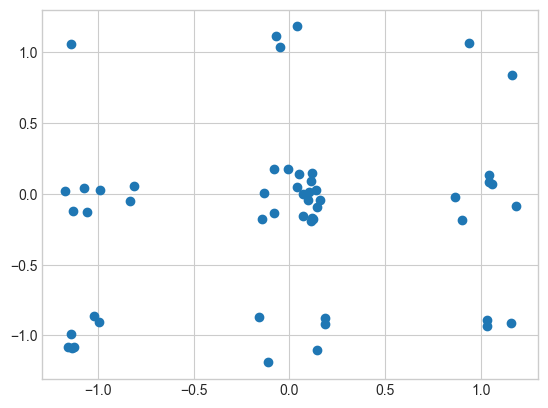

In [12]:
compare_0_3 = data.loc[data.session_comparison == "0_3"]
x = compare_0_3.x_difference.values
y = compare_0_3.y_difference.values

jitter = 0.19
x_jittered = np.array(x) + np.random.uniform(-jitter, jitter, len(x))
y_jittered = np.array(y) + np.random.uniform(-jitter, jitter, len(y))

plt.scatter(x_jittered, y_jittered)


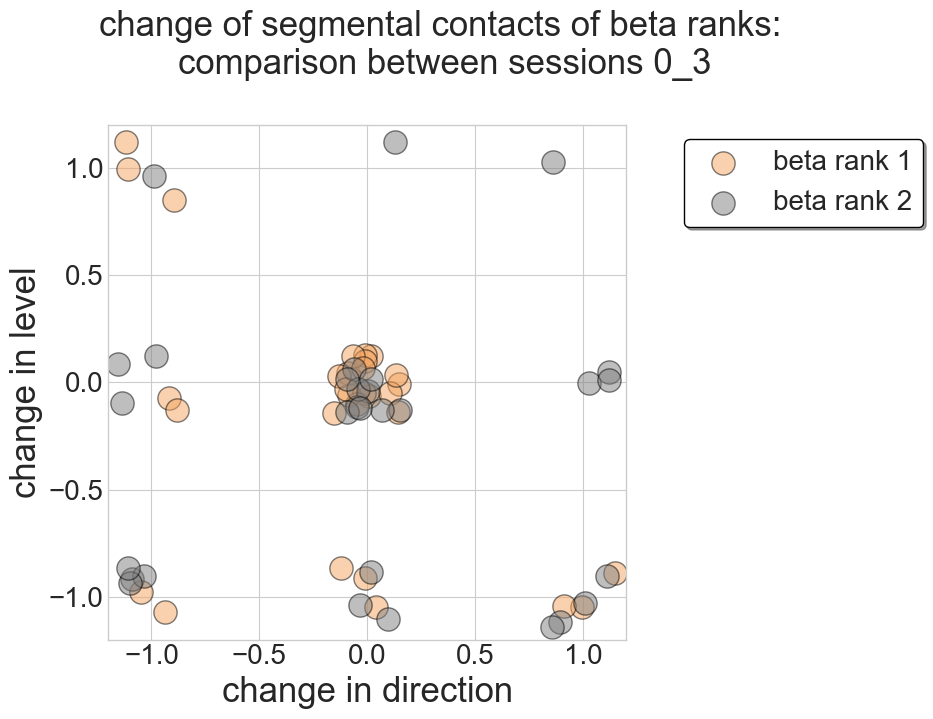

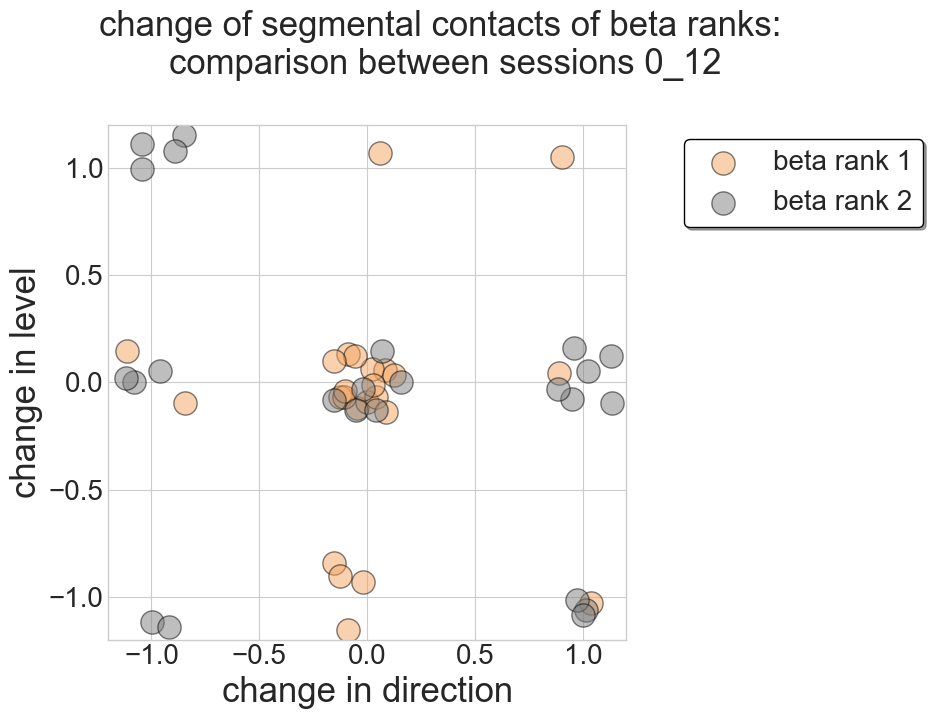

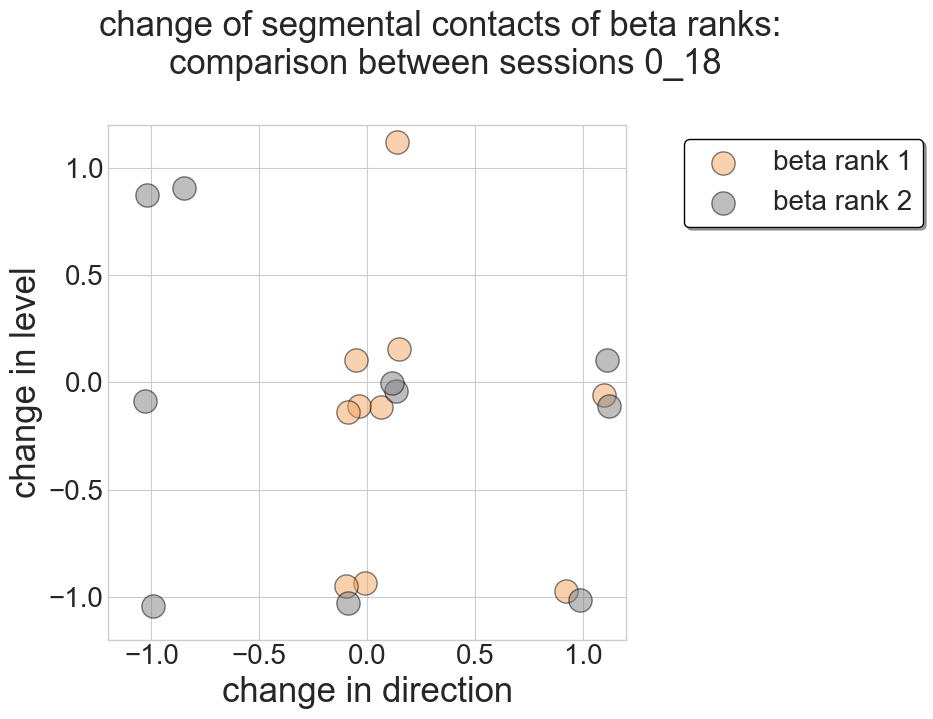

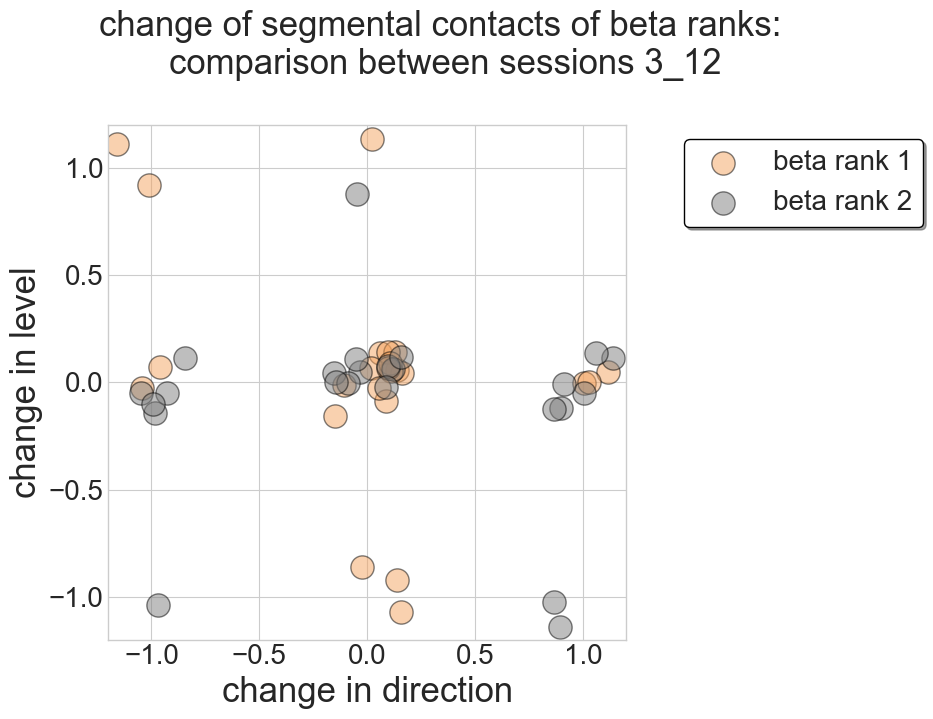

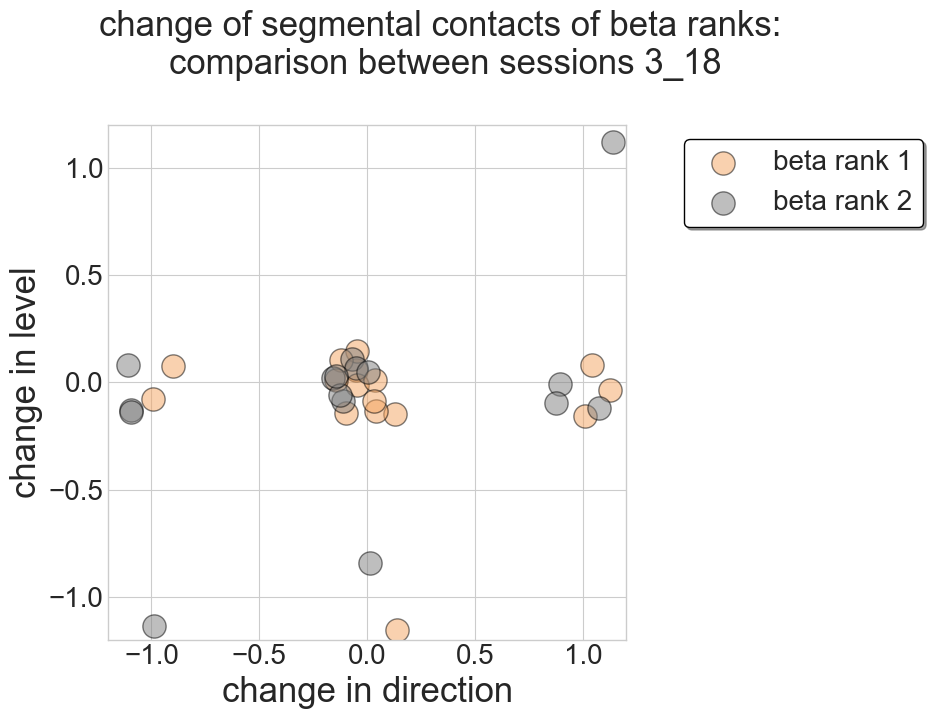

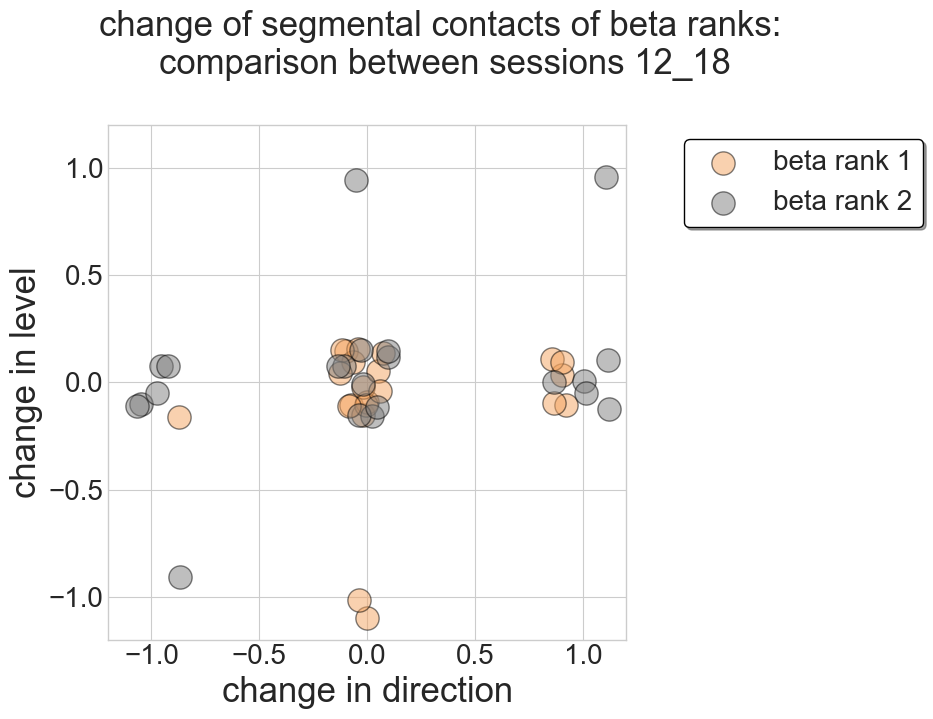

In [3]:
scatterplot_xy_differences = beta_rank_change.fooof_beta_rank_coord_difference_scatterplot(
    similarity_calculation="inverse_distance",
    fooof_version="v2",    
    ranks_included=[1, 2]
)

## 5. Quantify difference of direction of ranks only for segmental contacts (mono method only for segm recordings used)

In [28]:
mono_rank_only_segm = groupMonopol.mono_rank_differences_only_segmental_rec_used(
    filter_signal = "band-pass",
    normalization = "rawPsd",
    freq_band = "beta"
)

pickle file loaded:  group_monoRef_only_segmental_weight_psd_by_distance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [29]:
mono_rank_only_segm.head()

session_comparison session_1 session_2 subject_hemisphere  \
0_0_024_Right_1                0_0         0         0          024_Right   
0_0_024_Right_2                0_0         0         0          024_Right   
0_0_024_Right_3                0_0         0         0          024_Right   
0_0_024_Right_4                0_0         0         0          024_Right   
0_0_024_Right_5                0_0         0         0          024_Right   

                rank direction_session_1 direction_session_2  \
0_0_024_Right_1    1                   A                   A   
0_0_024_Right_2    2                   B                   B   
0_0_024_Right_3    3                   C                   C   
0_0_024_Right_4    4                   A                   A   
0_0_024_Right_5    5                   B                   B   

                direction_difference  
0_0_024_Right_1                    0  
0_0_024_Right_2                    0  
0_0_024_Right_3                    0  
0_0_024_Right_4                    0  
0_0_024_Right_5                    0

pickle file loaded:  group_monoRef_only_segmental_weight_psd_by_distance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
ranks_included: ranks allowed = [1, 2, 3, 4, 5, 6].


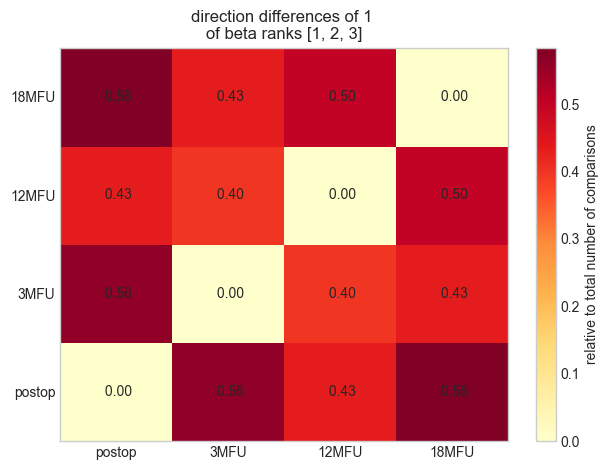

In [39]:
mono_rank_only_segm_heatmap = groupMonopol.mono_rank_difference_heatmap(
    filter_signal = "band-pass",
    normalization = "rawPsd",
    freq_band = "beta",
    ranks_included = [1, 2, 3],
    difference_to_plot = "1",
    level_or_direction = "direction",
    only_segmental = "yes"
)

## 6. FOOOF: Quantify difference of levels and direction of beta ranks + difference of ranks of highest rank contact

difference of direction: use segmental = "yes"; difference of levels: use segmental and rings

In [8]:
fooof_difference = groupMonopol.fooof_mono_rank_differences(
    fooof_spectrum="periodic_spectrum",
    level_or_direction_or_rank="level",
    similarity_calculation="inverse_distance"
)

In [9]:
fooof_difference.head()


session_comparison session_1 session_2 subject_hemisphere rank  \
0_0_024_Left_1                0_0         0         0           024_Left    1   
0_0_024_Left_2                0_0         0         0           024_Left    2   
0_0_024_Left_3                0_0         0         0           024_Left    3   
0_0_024_Left_4                0_0         0         0           024_Left    4   
0_0_024_Left_5                0_0         0         0           024_Left    5   

               level_session_1 level_session_2 level_difference  
0_0_024_Left_1               1               1                0  
0_0_024_Left_2               1               1                0  
0_0_024_Left_3               1               1                0  
0_0_024_Left_4               2               2                0  
0_0_024_Left_5               2               2                0

Write contingency table 2x2 of:
- beta rank 1 contact changed or did not change level (or direction) 
- beta rank 1 contact expected proportion of changed or did not change level (or direction)

In [ ]:
# contingency_table = pd.crosstab(data[f"beta_rank1_changed_level"], data["expected_behavior"]) # table counting all binary value combinations
            

In [10]:
diffference_data = groupMonopol.fooof_mono_rank_differences(
    fooof_spectrum="periodic_spectrum",
    level_or_direction_or_rank="rank",
    similarity_calculation="inverse_distance"

)

In [11]:
diffference_data.head()

# difference_to_plot options for "rank": "0", "1_or_less", "more_than_1"

session_comparison session_1 session_2 subject_hemisphere  \
0_0_024_Left                 0_0         0         0           024_Left   
0_0_024_Right                0_0         0         0          024_Right   
0_0_025_Left                 0_0         0         0           025_Left   
0_0_025_Right                0_0         0         0          025_Right   
0_0_026_Left                 0_0         0         0           026_Left   

              contact_rank1_session_1 rank_contact_session_2  \
0_0_024_Left                       1A                      1   
0_0_024_Right                       0                      1   
0_0_025_Left                       1A                      1   
0_0_025_Right                      1A                      1   
0_0_026_Left                       1A                      1   

              label_contact_session_2  
0_0_024_Left                        0  
0_0_024_Right                       0  
0_0_025_Left                        0  
0_0_025_Right                       0  
0_0_026_Left                        0

Plot heatmap

Parameters to use when running level_or_direction_or_rank="rank":
- difference_to_plot only 3 options: "0" = staying rank1, "1_or_less" = staying rank1 or 2, "more_than_1" = changing at least 2 ranks
- ranks_included = [1]: this doesn´t change the result, because there are only rank 1 contacts in the dataframe

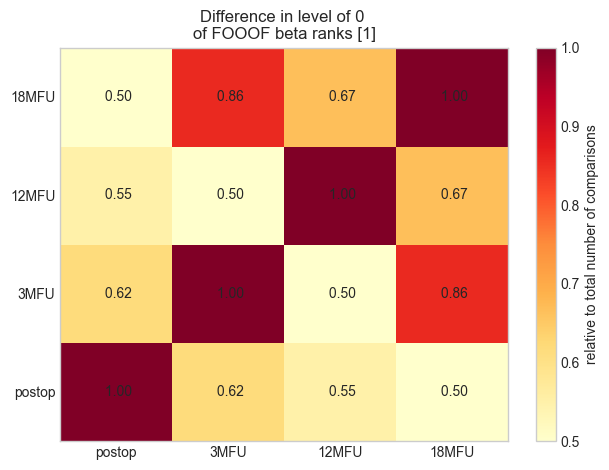

In [7]:
fooof_difference_heatmap = groupMonopol.fooof_mono_rank_difference_heatmap(
    fooof_spectrum="periodic_spectrum",
    level_or_direction_or_rank="level",
    difference_to_plot="0",
    ranks_included=[1],
    similarity_calculation="inverse_distance",
    label_percentage_or_division="percentage"
)

In [36]:
fooof_difference_heatmap["description_results"]

session_comparison number_of_observations number_of_stn      mean  \
0_0                  0_0                     38            38       0.0   
0_3                  0_3                     26            26  0.730769   
0_12                0_12                     20            20       1.0   
0_18                0_18                      8             8      0.75   
3_0                  3_0                     26            26  0.846154   
3_3                  3_3                     42            42       0.0   
3_12                3_12                     24            24  0.916667   
3_18                3_18                     14            14  0.357143   
12_0                12_0                     20            20      1.05   
12_3                12_3                     24            24  0.916667   
12_12              12_12                     38            38       0.0   
12_18              12_18                     18            18  0.722222   
18_0                18_0                      8             8      1.25   
18_3                18_3                     14            14       0.5   
18_12              18_12                     18            18  0.666667   
18_18              18_18                     18            18       0.0   

      standard_deviation  
0_0                  0.0  
0_3             0.811347  
0_12            0.894427  
0_18            0.661438  
3_0              0.90691  
3_3                  0.0  
3_12            0.862007  
3_18            0.610286  
12_0            0.920598  
12_3            0.862007  
12_12                0.0  
12_18           0.869582  
18_0            0.968246  
18_3            0.823754  
18_12           0.816497  
18_18                0.0

In [37]:
fooof_difference_heatmap["session_comparison_difference_df"]

session_comparison session_1 session_2 total_rank_comparisons  \
0_0                  0_0         0         0                     38   
0_3                  0_3         0         3                     26   
0_12                0_12         0        12                     20   
0_18                0_18         0        18                      8   
3_0                  3_0         3         0                     26   
3_3                  3_3         3         3                     42   
3_12                3_12         3        12                     24   
3_18                3_18         3        18                     14   
12_0                12_0        12         0                     20   
12_3                12_3        12         3                     24   
12_12              12_12        12        12                     38   
12_18              12_18        12        18                     18   
18_0                18_0        18         0                      8   
18_3                18_3        18         3                     14   
18_12              18_12        18        12                     18   
18_18              18_18        18        18                     18   

      rel_amount_staying_rank1 rel_amount_staying_rank1_or_2  \
0_0                        1.0                           1.0   
0_3                        0.5                      0.769231   
0_12                       0.4                           0.6   
0_18                     0.375                         0.875   
3_0                        0.5                      0.653846   
3_3                        1.0                           1.0   
3_12                  0.416667                      0.666667   
3_18                  0.714286                      0.928571   
12_0                       0.4                          0.55   
12_3                  0.416667                      0.666667   
12_12                      1.0                           1.0   
12_18                 0.555556                      0.722222   
18_0                     0.375                         0.375   
18_3                  0.714286                      0.785714   
18_12                 0.555556                      0.777778   
18_18                      1.0                           1.0   

      rel_amount_changing_at_least_2_ranks proportion_staying_rank1  \
0_0                                    0.0                  38 / 38   
0_3                               0.230769                  13 / 26   
0_12                                   0.4                   8 / 20   
0_18                                 0.125                    3 / 8   
3_0                               0.346154                  13 / 26   
3_3                                    0.0                  42 / 42   
3_12                              0.333333                  10 / 24   
3_18                              0.071429                  10 / 14   
12_0                                  0.45                   8 / 20   
12_3                              0.333333                  10 / 24   
12_12                                  0.0                  38 / 38   
12_18                             0.277778                  10 / 18   
18_0                                 0.625                    3 / 8   
18_3                              0.214286                  10 / 14   
18_12                             0.222222                  10 / 18   
18_18                                  0.0                  18 / 18   

      proportion_staying_rank1_or_2 proportion_changing_at_least_2_ranks  
0_0                         38 / 38                               0 / 38  
0_3                         20 / 26                               6 / 26  
0_12                        12 / 20                               8 / 20  
0_18                          7 / 8                                1 / 8  
3_0                         17 / 26                               9 / 26  
3_3                         42 / 42                

## 7. FOOOF beta rank 1 change of direction permutation test


In [7]:
fooof_data = beta_ranks_change.write_df_xy_changes_of_beta_ranks(
    similarity_calculation="inverse_distance",
    ranks_included=[1, 2]
)

In [8]:
data = fooof_data["coord_difference_dataframe"]


In [21]:
# seperately for x_difference and y_difference
# 
len(data["x_difference"].abs())

712

In [ ]:
permute_contact_location = beta_ranks_change.permutation_fooof_beta_rank_location_differences(
    ranks_included=[1,2]
)

In [ ]:
permute_contact_location["permutation_result_df"]